<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_3151-3200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1611]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [1612]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

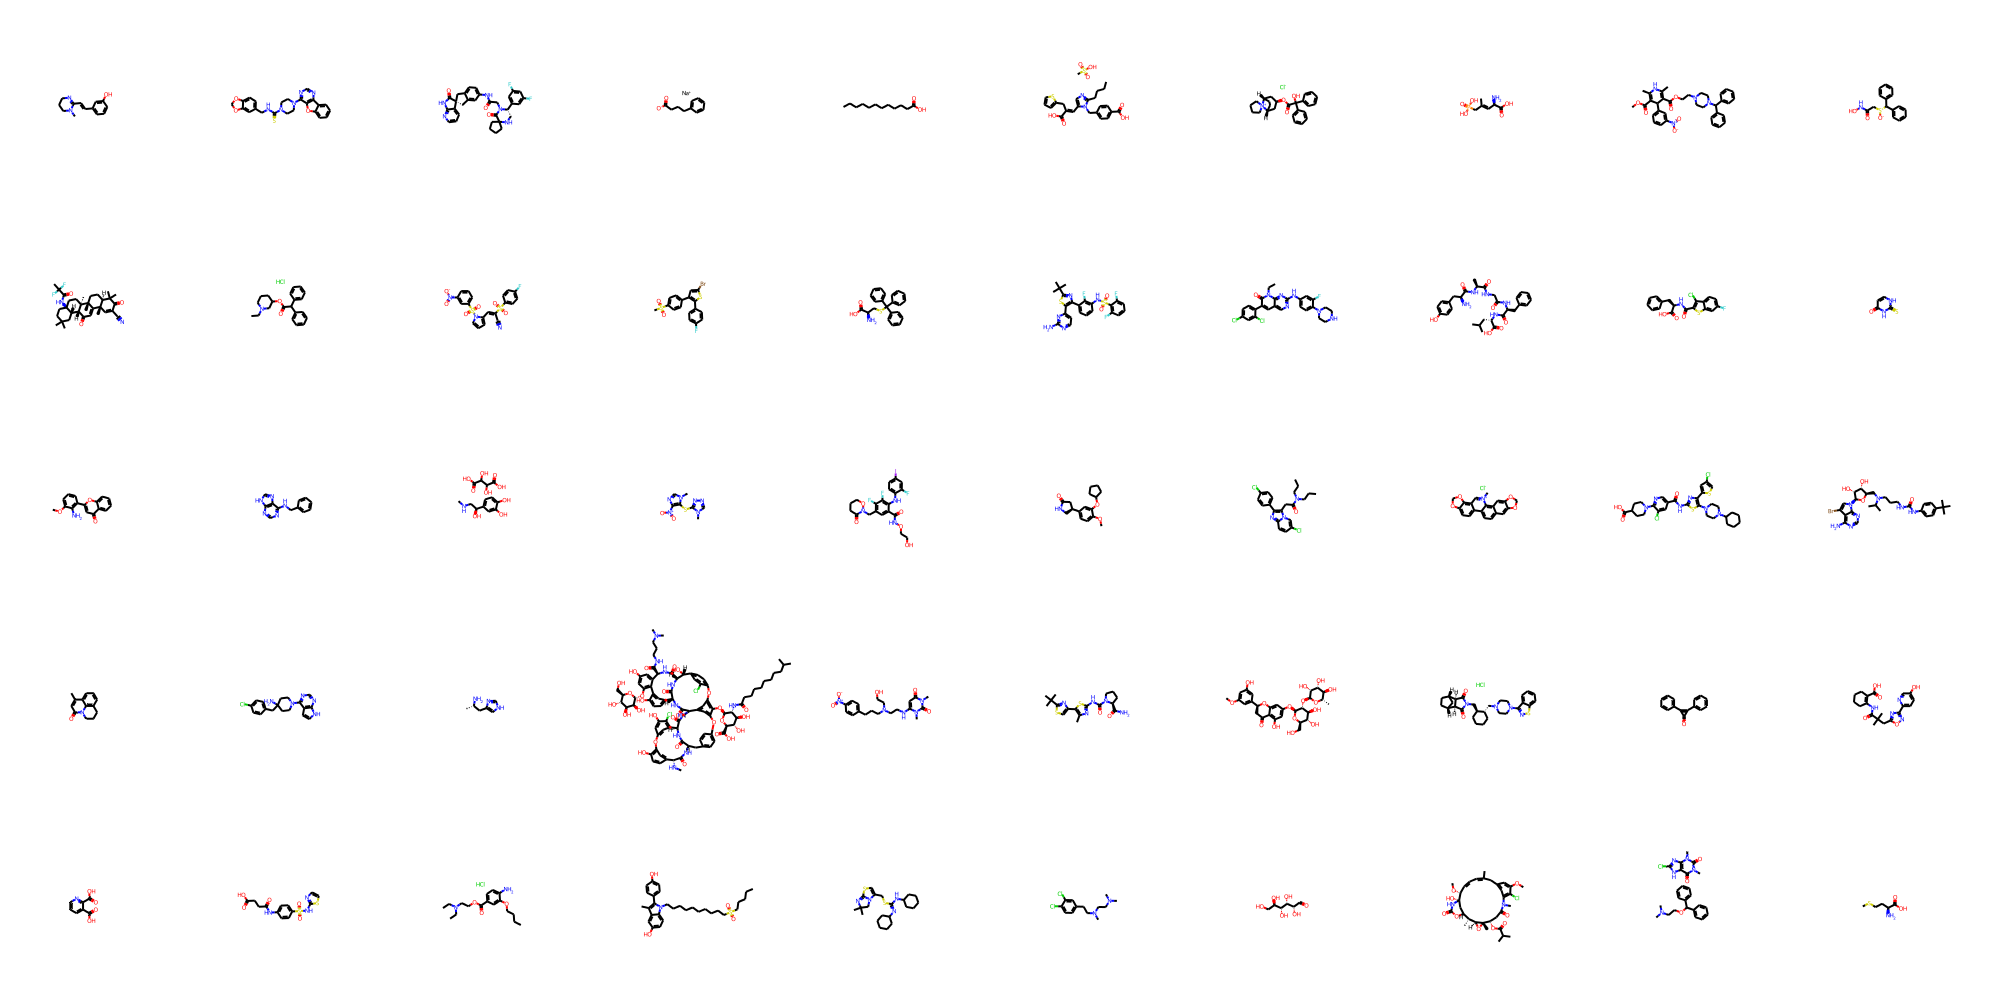

In [1613]:
smiles_list = [
               
'CN1CCCN=C1/C=C/c1cccc(O)c1',
'S=C(NCc1ccc2c(c1)OCO2)N1CCN(c2ncnc3c2oc2ccccc23)CC1',
'O=C(CN1C(=O)C2(CCCC2)NC[C@H]1c1cc(F)cc(F)c1)Nc1ccc2c(c1)C[C@@]1(C2)C(=O)Nc2ncccc21',
'O=C([O-])CCCc1ccccc1.[Na+]',
'CCCCCCCCCCCC(=O)O',
'CCCCc1ncc(/C=C(\Cc2cccs2)C(=O)O)n1Cc1ccc(C(=O)O)cc1.CS(=O)(=O)O',
'O=C(O[C@@H]1C[C@@H]2CC[C@H](C1)[N+]21CCCC1)C(O)(c1ccccc1)c1ccccc1.[Cl-]',
'C/C(=C\[C@@H](N)C(=O)O)CP(=O)(O)O',
'COC(=O)C1=C(C)NC(C)=C(C(=O)OCCN2CCN(C(c3ccccc3)c3ccccc3)CC2)C1c1cccc([N+](=O)[O-])c1',
'O=C(C[S+]([O-])C(c1ccccc1)c1ccccc1)NO',
'CC1(C)CC[C@]2(NC(=O)C(C)(F)F)CC[C@]3(C)[C@H](C(=O)C=C4[C@@]3(C)CC[C@H]3C(C)(C)C(=O)C(C#N)=C[C@]43C)[C@@H]2C1',
'CCN1CCCC(OC(=O)C(c2ccccc2)c2ccccc2)C1.Cl',
'N#C/C(=C\c1cccn1S(=O)(=O)c1cccc([N+](=O)[O-])c1)S(=O)(=O)c1ccc(F)cc1',
'CS(=O)(=O)c1ccc(-c2cc(Br)sc2-c2ccc(F)cc2)cc1',
'N[C@H](CSC(c1ccccc1)(c1ccccc1)c1ccccc1)C(=O)O',
'CC(C)(C)c1nc(-c2cccc(NS(=O)(=O)c3c(F)cccc3F)c2F)c(-c2ccnc(N)n2)s1',
'CCn1c(=O)c(-c2ccc(Cl)cc2Cl)cc2cnc(Nc3ccc(N4CCNCC4)c(F)c3)nc21',
'CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)CNC(=O)[C@H](C)NC(=O)[C@@H](N)Cc1ccc(O)cc1)C(=O)O',
'O=C(N[C@H](Cc1ccccc1)C(=O)O)c1sc2cc(F)ccc2c1Cl',
'O=c1cc[nH]c(=S)[nH]1',
'COc1cccc(-c2cc(=O)c3ccccc3o2)c1N',
'c1ccc(CNc2ncnc3[nH]cnc23)cc1',
'CNC[C@H](O)c1ccc(O)c(O)c1.O=C(O)C(O)C(O)C(=O)O',
'Cn1cnnc1Sc1c([N+](=O)[O-])ncn1C',
'O=C(NOCCO)c1cc(CN2OCCCC2=O)c(F)c(F)c1Nc1ccc(I)cc1F',
'COc1ccc([C@H]2CNC(=O)C2)cc1OC1CCCC1',
'CCCN(CCC)C(=O)Cc1c(-c2ccc(Cl)cc2)nc2ccc(Cl)cn12',
'C[n+]1cc2c3c(ccc2c2ccc4cc5c(cc4c21)OCO5)OCO3.[Cl-]',
'O=C(Nc1nc(-c2cc(Cl)cs2)c(N2CCN(C3CCCCC3)CC2)s1)c1cnc(N2CCC(C(=O)O)CC2)c(Cl)c1',
'CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)C[C@H]1O[C@@H](n2cc(Br)c3c(N)ncnc32)[C@H](O)[C@@H]1O',
'Cc1cc(=O)n2c3c(cccc13)CCC2',
'NC1(Cc2ccc(Cl)cc2)CCN(c2ncnc3[nH]ccc23)CC1',
'C[C@H](N)Cc1c[nH]cn1',
'CN[C@H]1C(=O)N[C@@H]2Cc3ccc(cc3)Oc3cc4cc(c3O[C@@H]3O[C@H](C(=O)O)[C@@H](O)[C@H](O)[C@H]3NC(=O)CCCCCCCCC(C)C)Oc3ccc(cc3Cl)[C@@H](O)[C@@H]3NC(=O)[C@H](NC(=O)[C@@H]4NC(=O)[C@@H](NC2=O)c2cc(cc(O)c2Cl)Oc2cc1ccc2O)c1ccc(O)c(c1)-c1c(O[C@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@@H]2O)cc(O)cc1[C@@H](C(=O)NCCCN(C)C)NC3=O',
'Cn1c(NCCN(CCO)CCCc2ccc([N+](=O)[O-])cc2)cc(=O)n(C)c1=O',
'Cc1nc(NC(=O)N2CCC[C@H]2C(N)=O)sc1-c1csc(C(C)(C)C)n1',
'COc1cc(O)cc([C@@H]2CC(=O)c3c(O)cc(O[C@@H]4O[C@H](CO)[C@@H](O)[C@H](O)[C@H]4O[C@@H]4O[C@@H](C)[C@H](O)[C@@H](O)[C@H]4O)cc3O2)c1',
'Cl.O=C1[C@H]2[C@@H]3CC[C@@H](C3)[C@H]2C(=O)N1C[C@@H]1CCCC[C@H]1CN1CCN(c2nsc3ccccc23)CC1',
'O=c1c(-c2ccccc2)c1-c1ccccc1',
'CC(C)(Cc1nc(-c2ccc(O)cn2)no1)C(=O)NC1=C(C(=O)O)CCCC1',
'O=C(O)c1cccnc1C(=O)O',
'O=C(O)CCC(=O)Nc1ccc(S(=O)(=O)Nc2nccs2)cc1',
'CCCCOc1cc(C(=O)OCCN(CC)CC)ccc1N.Cl',
'CCCCCS(=O)(=O)CCCCCCCCCCn1c(-c2ccc(O)cc2)c(C)c2cc(O)ccc21',
'CC1(C)CN2C(CS/C(=N\C3CCCCC3)NC3CCCCC3)=CSC2=N1',
'CN(C)CCN(C)CCc1ccc(Cl)c(Cl)c1',
'O=C[C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO',
'COc1cc2cc(c1Cl)N(C)C(=O)C[C@H](OC(=O)C(C)C)[C@]1(C)O[C@H]1[C@H](C)[C@@H]1C[C@@](O)(NC(=O)O1)[C@H](OC)/C=C/C=C(\C)C2',
'CN(C)CCOC(c1ccccc1)c1ccccc1.Cn1c(=O)c2[nH]c(Cl)nc2n(C)c1=O',
'CSCC[C@H](N)C(=O)O',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



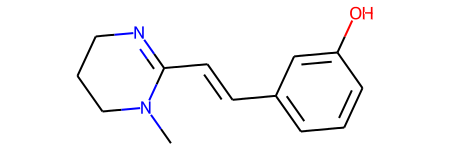

In [1614]:
M1 = mol_list [0]
M1

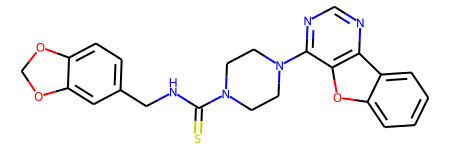

In [1615]:
M2 = mol_list [1]
M2

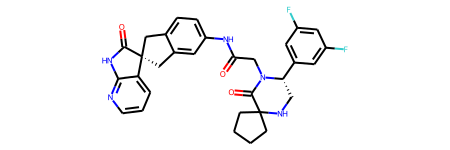

In [1616]:
M3 = mol_list [2]
M3

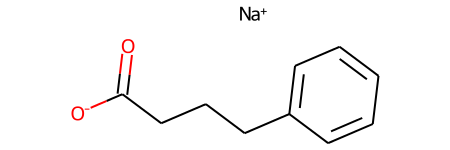

In [1617]:
M4 = mol_list [3]
M4

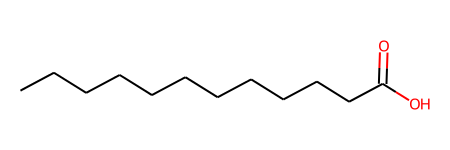

In [1618]:
M5 = mol_list [4]
M5

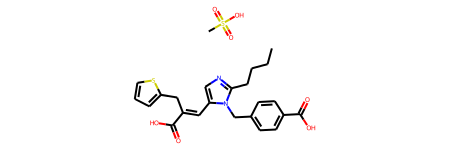

In [1619]:
M6 = mol_list [5]
M6

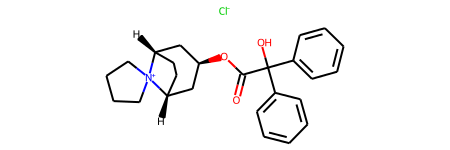

In [1620]:
M7 = mol_list [6]
M7

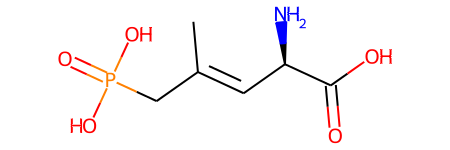

In [1621]:
M8 = mol_list [7]
M8

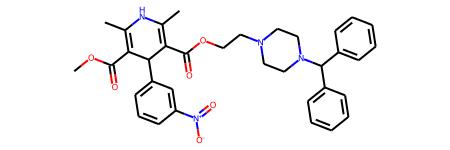

In [1622]:
M9 = mol_list [8]
M9

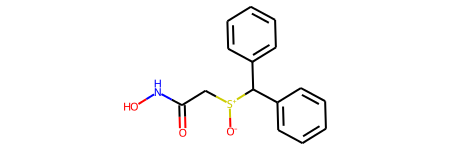

In [1623]:
M10 = mol_list [9]
M10

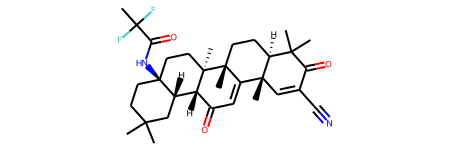

In [1624]:
M11 = mol_list [10]
M11

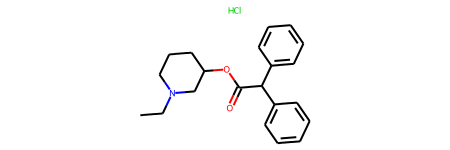

In [1625]:
M12 = mol_list [11]
M12

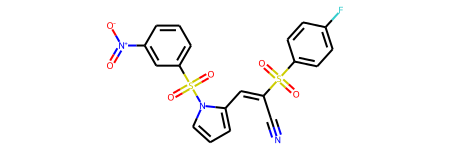

In [1626]:
M13 = mol_list [12]
M13

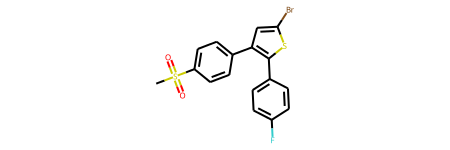

In [1627]:
M14 = mol_list [13]
M14

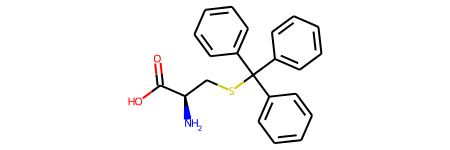

In [1628]:
M15 = mol_list [14]
M15

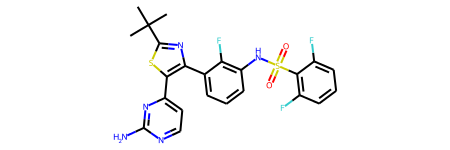

In [1629]:
M16 = mol_list [15]
M16

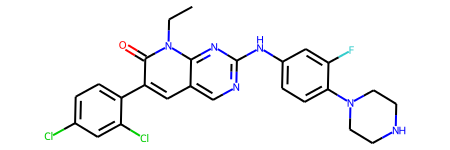

In [1630]:
M17 = mol_list [16]
M17

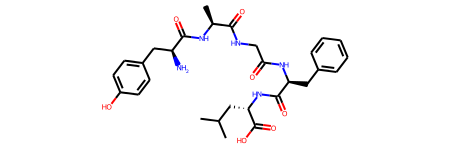

In [1631]:
M18 = mol_list [17]
M18

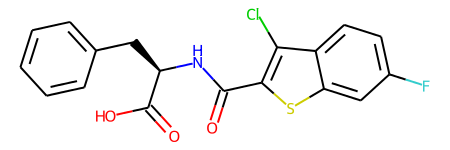

In [1632]:
M19 = mol_list [18]
M19

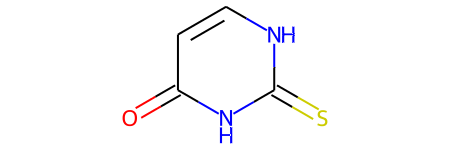

In [1633]:
M20 = mol_list [19]
M20

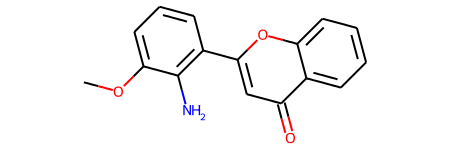

In [1634]:
M21 = mol_list [20]
M21

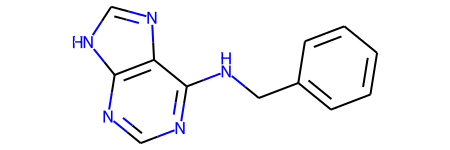

In [1635]:
M22 = mol_list [21]
M22

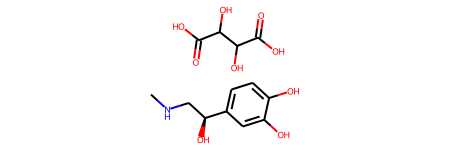

In [1636]:
M23 = mol_list [22]
M23

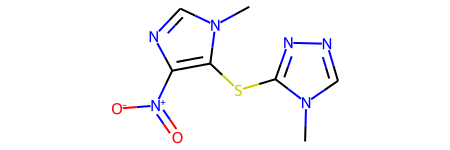

In [1637]:
M24 = mol_list [23]
M24

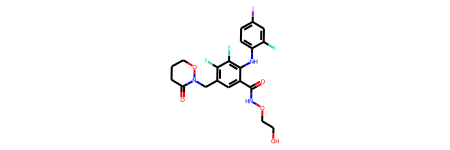

In [1638]:
M25 = mol_list [24]
M25

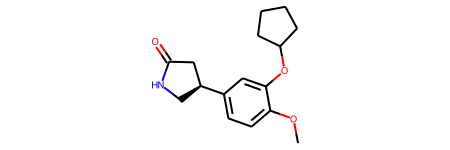

In [1639]:
M26 = mol_list [25]
M26

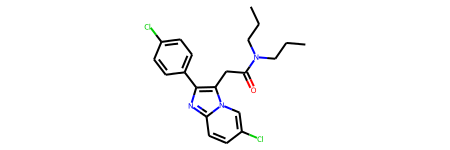

In [1640]:
M27 = mol_list [26]
M27

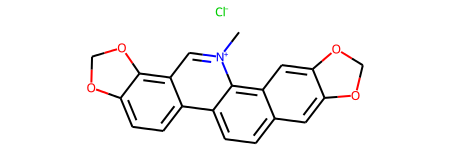

In [1641]:
M28 = mol_list [27]
M28

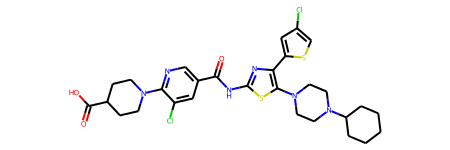

In [1642]:
M29 = mol_list [28]
M29

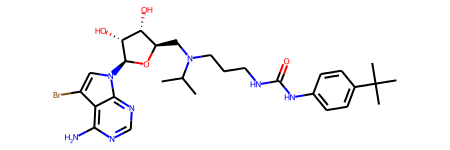

In [1643]:
M30 = mol_list [29]
M30

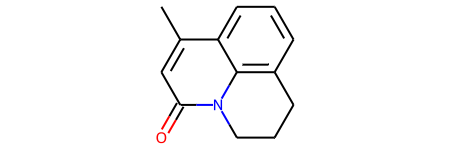

In [1644]:
M31 = mol_list [30]
M31

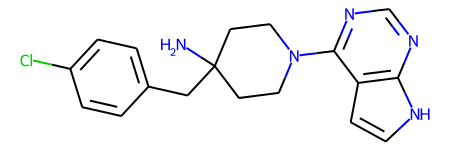

In [1645]:
M32 = mol_list [31]
M32

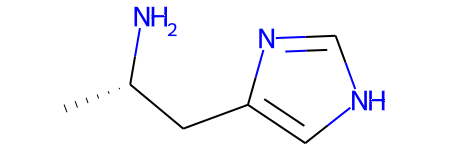

In [1646]:
M33 = mol_list [32]
M33

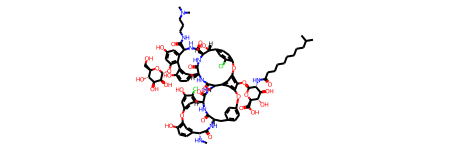

In [1647]:
M34 = mol_list [33]
M34

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


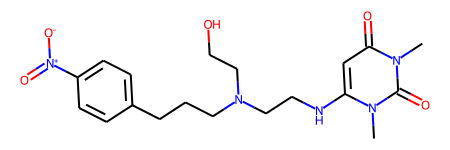

In [1648]:
M35 = mol_list [34]
M35

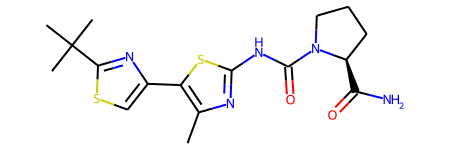

In [1649]:
M36 = mol_list [35]
M36

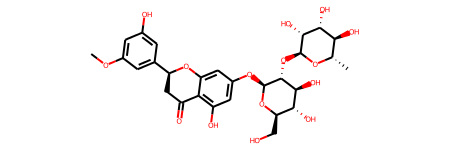

In [1650]:
M37= mol_list [36]
M37

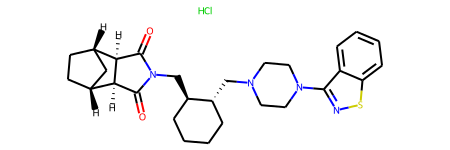

In [1651]:
M38= mol_list [37]
M38

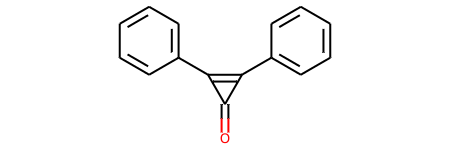

In [1652]:
M39= mol_list [38]
M39

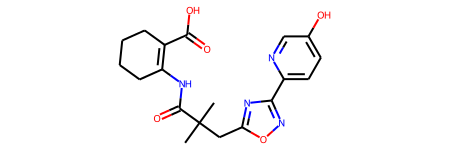

In [1653]:
M40= mol_list [39]
M40

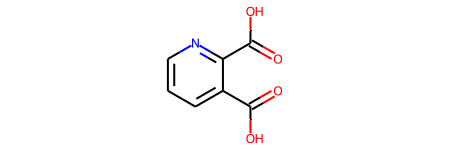

In [1654]:
M41= mol_list [40]
M41

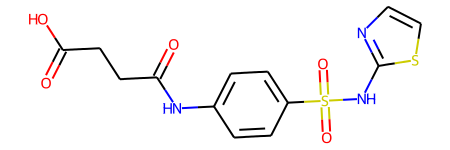

In [1655]:
M42= mol_list [41]
M42

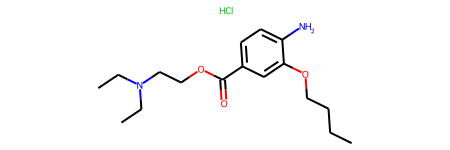

In [1656]:
M43= mol_list [42]
M43

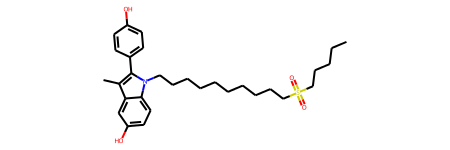

In [1657]:
M44= mol_list [43]
M44

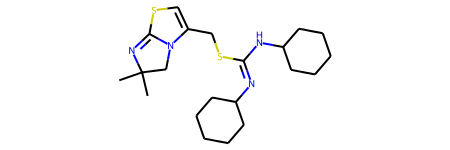

In [1658]:
M45= mol_list [44]
M45

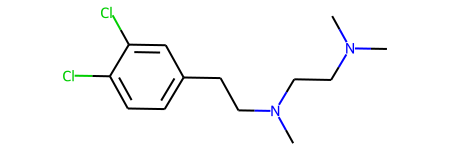

In [1659]:
M46= mol_list [45]
M46

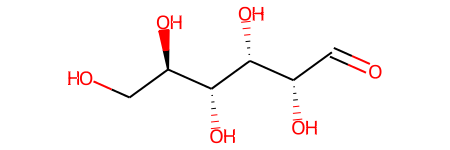

In [1660]:
M47= mol_list [46]
M47

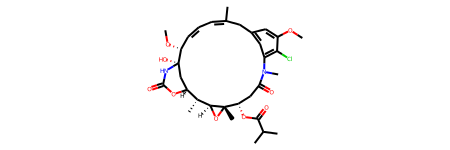

In [1661]:
M48= mol_list [47]
M48

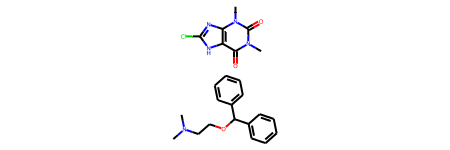

In [1662]:
M49= mol_list [48]
M49

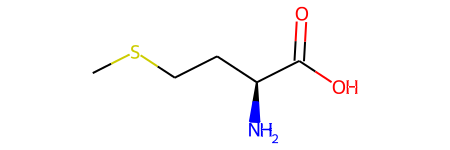

In [1663]:
M50= mol_list [49]
M50

In [1664]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[4,
 15,
 33,
 64,
 65,
 72,
 121,
 132,
 313,
 329,
 333,
 356,
 378,
 381,
 456,
 578,
 584,
 669,
 694,
 695,
 722,
 726,
 745,
 747,
 800,
 807,
 835,
 849,
 875,
 881,
 926,
 935,
 958,
 984,
 1009,
 1017]

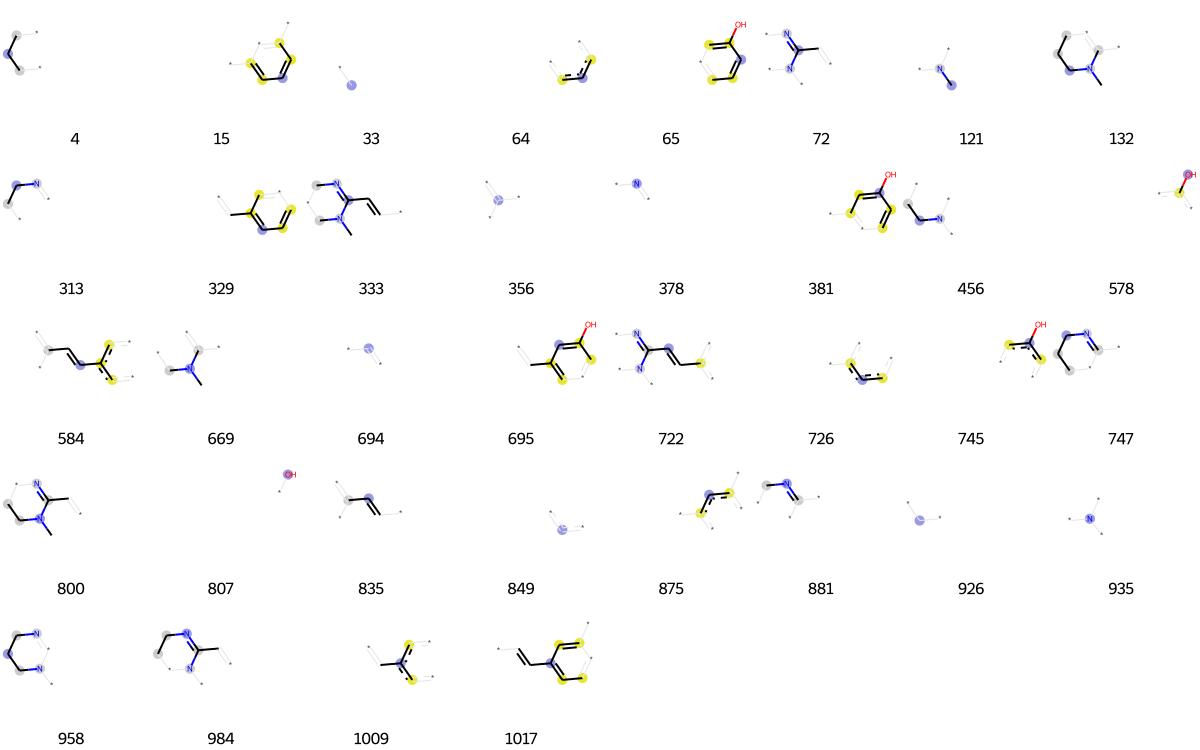

In [1665]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [1666]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[11,
 64,
 80,
 92,
 97,
 104,
 110,
 128,
 130,
 133,
 149,
 164,
 175,
 197,
 255,
 310,
 325,
 333,
 351,
 356,
 368,
 369,
 378,
 407,
 428,
 441,
 448,
 452,
 456,
 484,
 489,
 490,
 549,
 565,
 580,
 618,
 623,
 643,
 656,
 700,
 726,
 730,
 738,
 755,
 764,
 776,
 782,
 784,
 785,
 786,
 807,
 839,
 849,
 875,
 881,
 926,
 935,
 985]

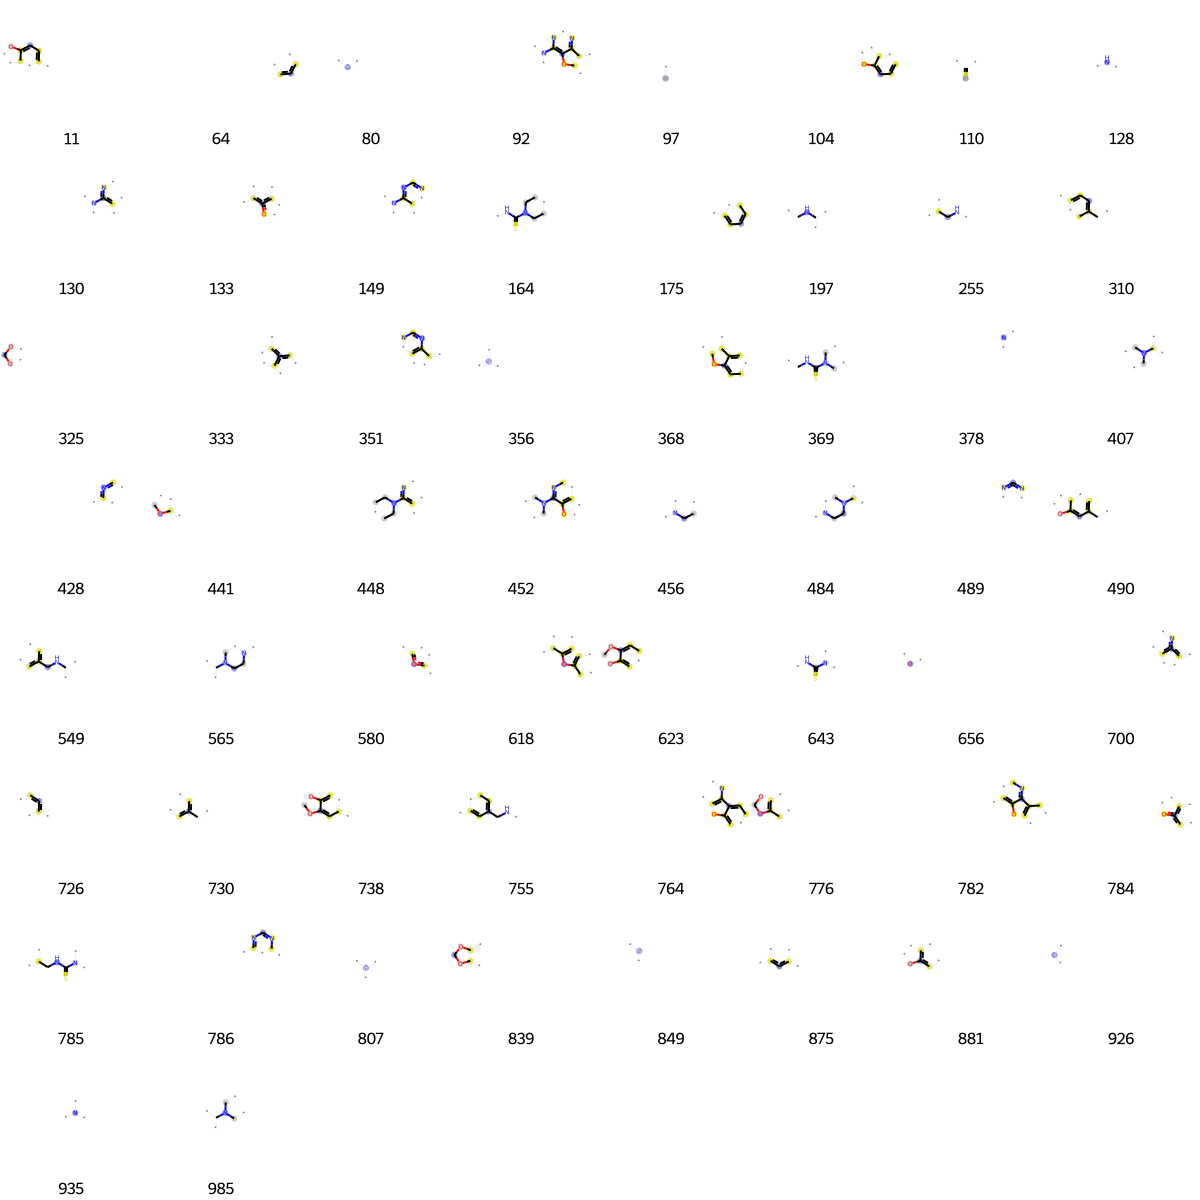

In [1667]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [1668]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[4,
 19,
 36,
 41,
 64,
 71,
 80,
 90,
 114,
 128,
 138,
 169,
 176,
 184,
 191,
 212,
 235,
 237,
 243,
 255,
 260,
 283,
 288,
 294,
 314,
 321,
 335,
 356,
 378,
 394,
 396,
 415,
 428,
 436,
 448,
 459,
 470,
 500,
 516,
 537,
 614,
 646,
 650,
 668,
 699,
 713,
 726,
 751,
 767,
 787,
 792,
 795,
 807,
 842,
 843,
 849,
 862,
 875,
 893,
 901,
 904,
 926,
 935,
 940,
 943,
 956,
 1015,
 1019]

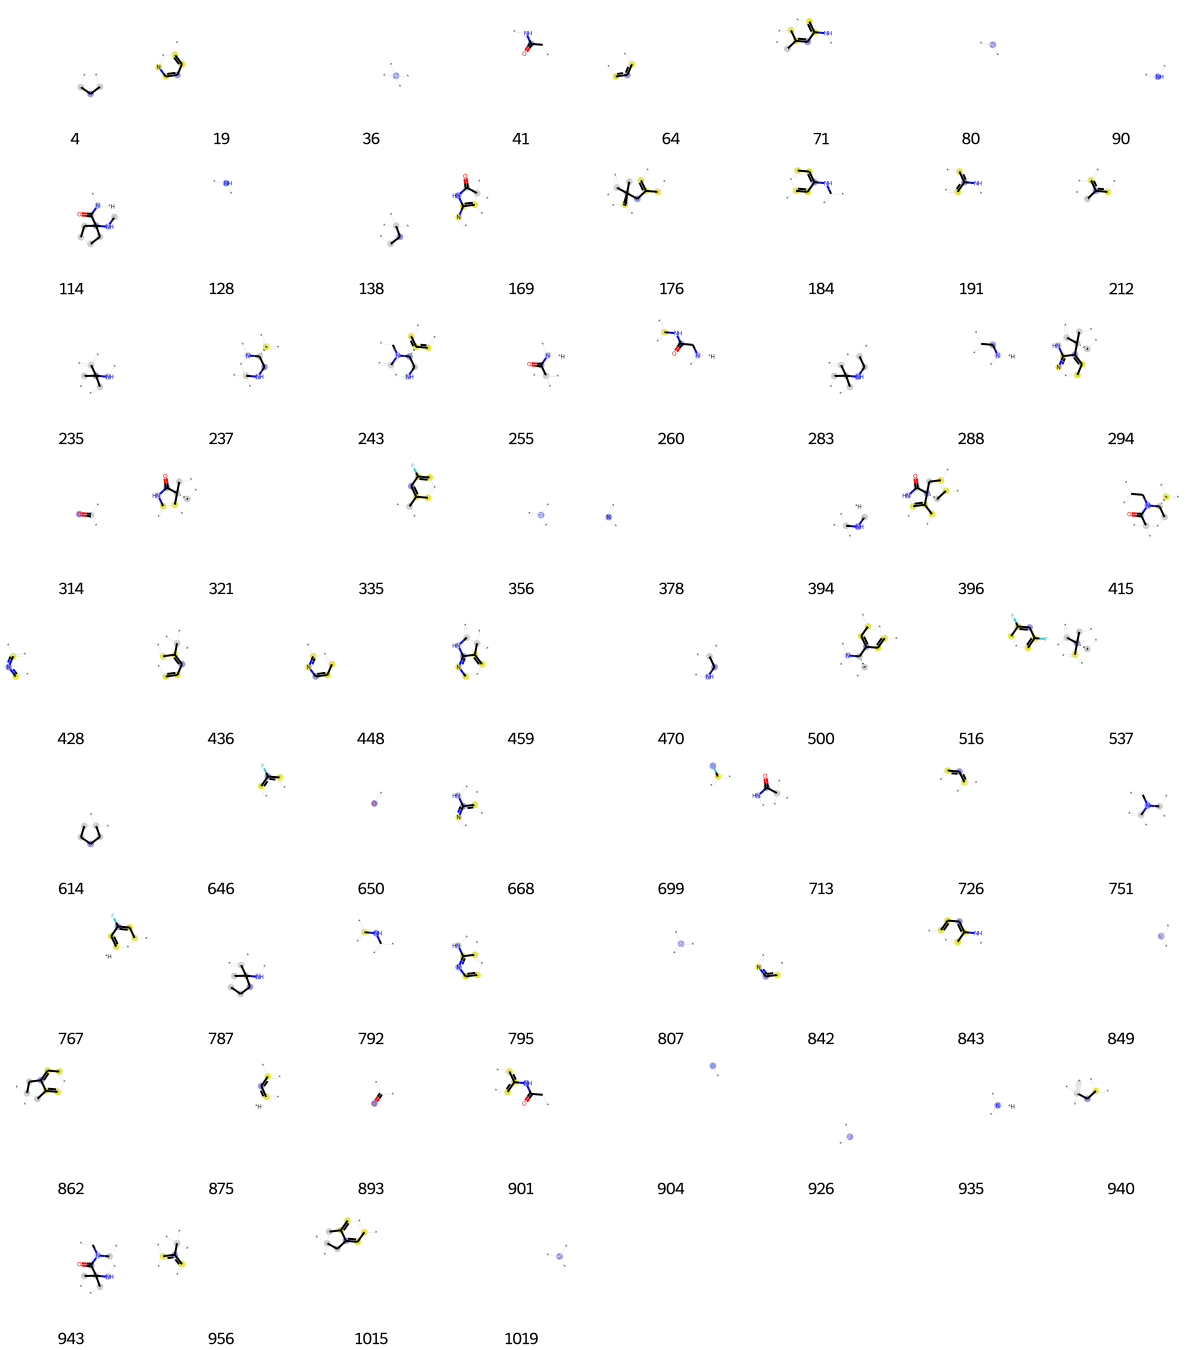

In [1669]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [1670]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[21,
 42,
 64,
 80,
 175,
 189,
 202,
 219,
 356,
 389,
 540,
 650,
 715,
 717,
 726,
 730,
 735,
 785,
 807,
 814,
 849,
 887,
 893,
 978]

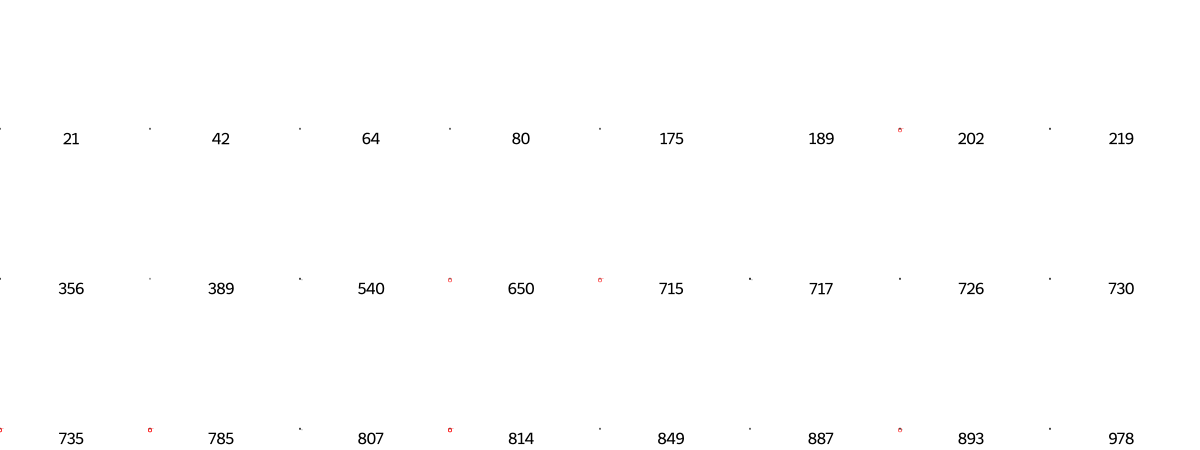

In [1671]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [1672]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[33,
 80,
 86,
 119,
 243,
 263,
 294,
 389,
 420,
 540,
 591,
 650,
 713,
 794,
 807,
 887,
 893]

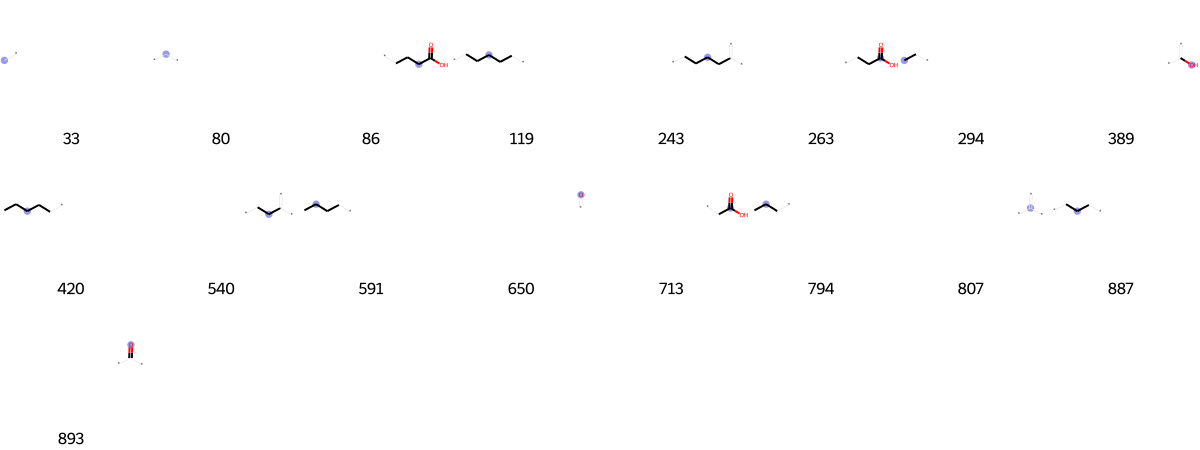

In [1673]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [1674]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[14,
 25,
 33,
 54,
 64,
 80,
 106,
 114,
 128,
 196,
 201,
 219,
 232,
 241,
 294,
 309,
 310,
 312,
 318,
 325,
 335,
 350,
 356,
 361,
 378,
 383,
 389,
 428,
 446,
 452,
 456,
 510,
 511,
 543,
 591,
 592,
 611,
 650,
 656,
 659,
 673,
 675,
 692,
 694,
 722,
 726,
 730,
 741,
 778,
 794,
 802,
 807,
 849,
 884,
 887,
 892,
 893,
 911,
 935,
 975,
 1001]

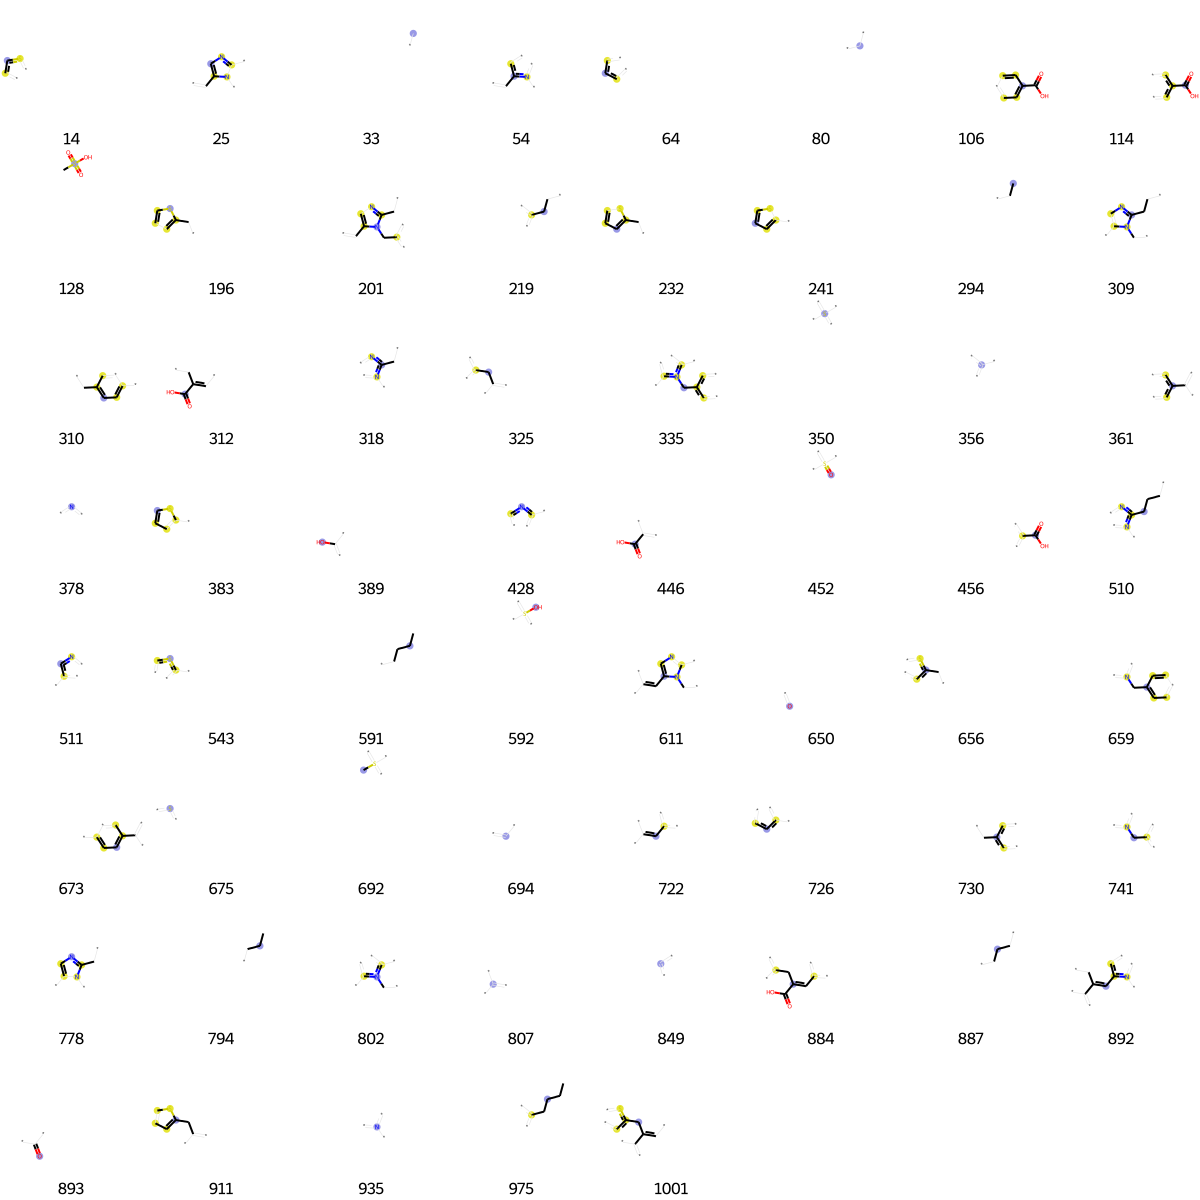

In [1675]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [1676]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[4,
 64,
 70,
 102,
 114,
 119,
 175,
 189,
 221,
 240,
 268,
 271,
 278,
 281,
 301,
 356,
 389,
 392,
 393,
 423,
 426,
 575,
 606,
 625,
 647,
 650,
 695,
 726,
 761,
 762,
 807,
 842,
 849,
 884,
 893,
 926,
 985,
 993,
 1019]

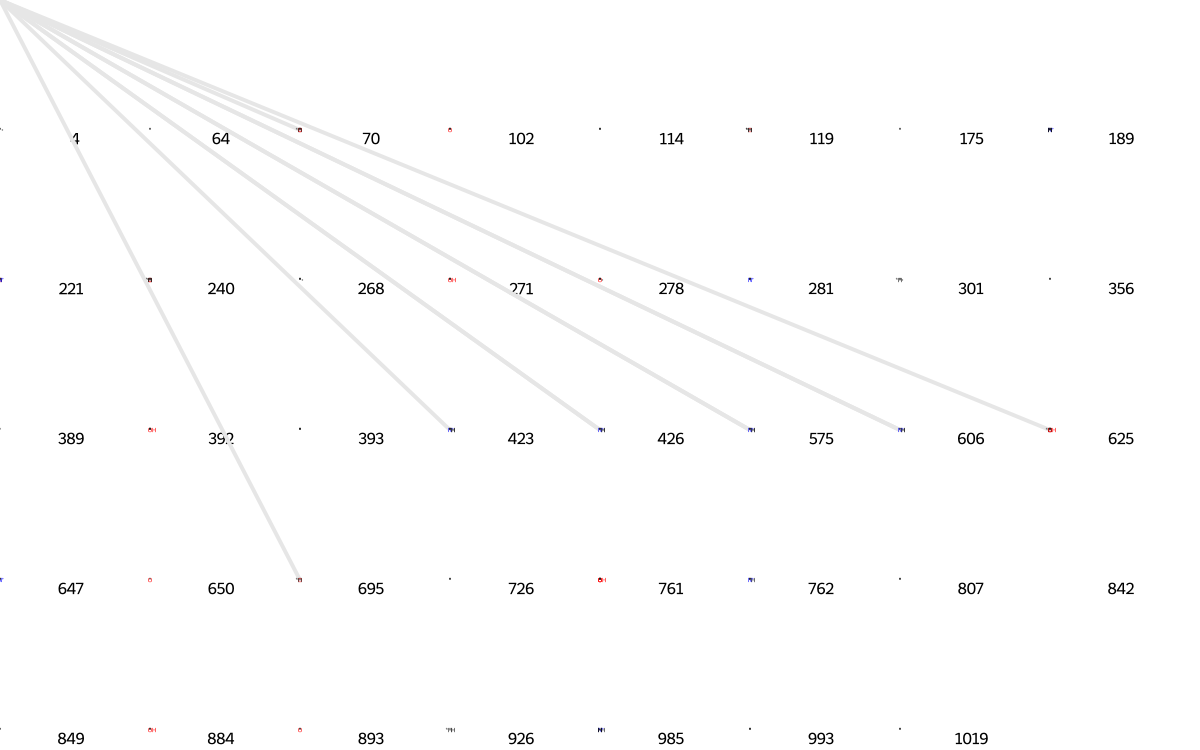

In [1677]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [1678]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[1,
 33,
 38,
 80,
 145,
 147,
 192,
 267,
 298,
 389,
 486,
 491,
 605,
 625,
 650,
 656,
 690,
 694,
 739,
 745,
 786,
 807,
 814,
 820,
 893,
 1017]

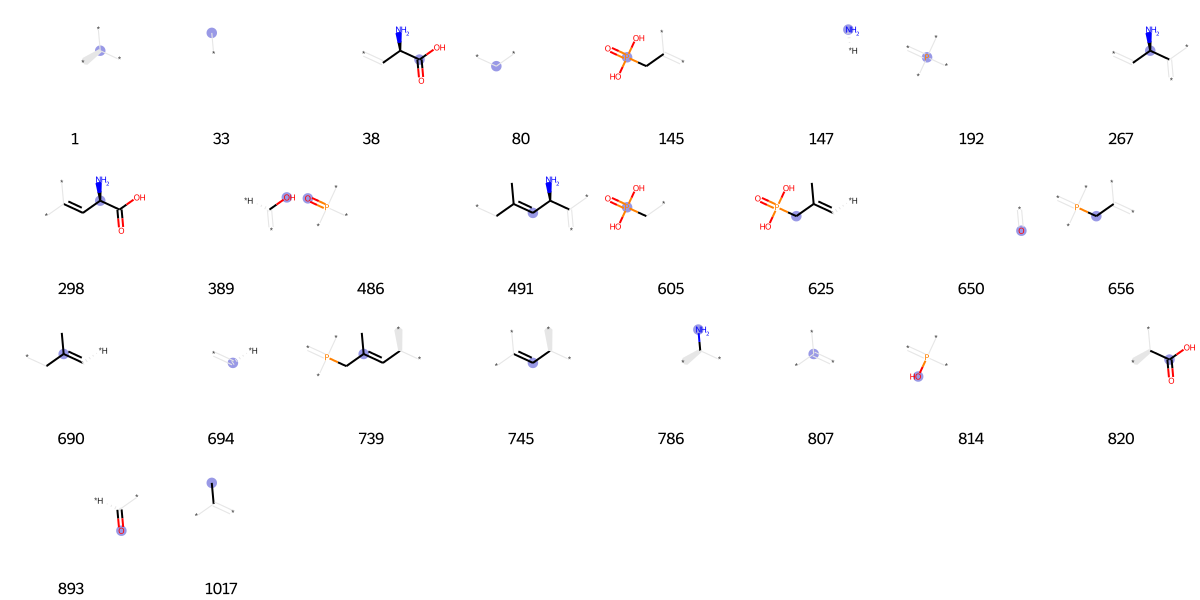

In [1679]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [1680]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[1,
 13,
 15,
 33,
 36,
 64,
 74,
 79,
 80,
 90,
 121,
 128,
 143,
 145,
 147,
 171,
 175,
 241,
 250,
 255,
 297,
 340,
 341,
 356,
 389,
 440,
 456,
 458,
 461,
 484,
 533,
 557,
 568,
 586,
 603,
 627,
 639,
 650,
 695,
 698,
 715,
 726,
 753,
 767,
 785,
 807,
 838,
 841,
 849,
 871,
 875,
 878,
 893,
 906,
 916,
 926,
 935,
 939,
 987,
 1005,
 1019]

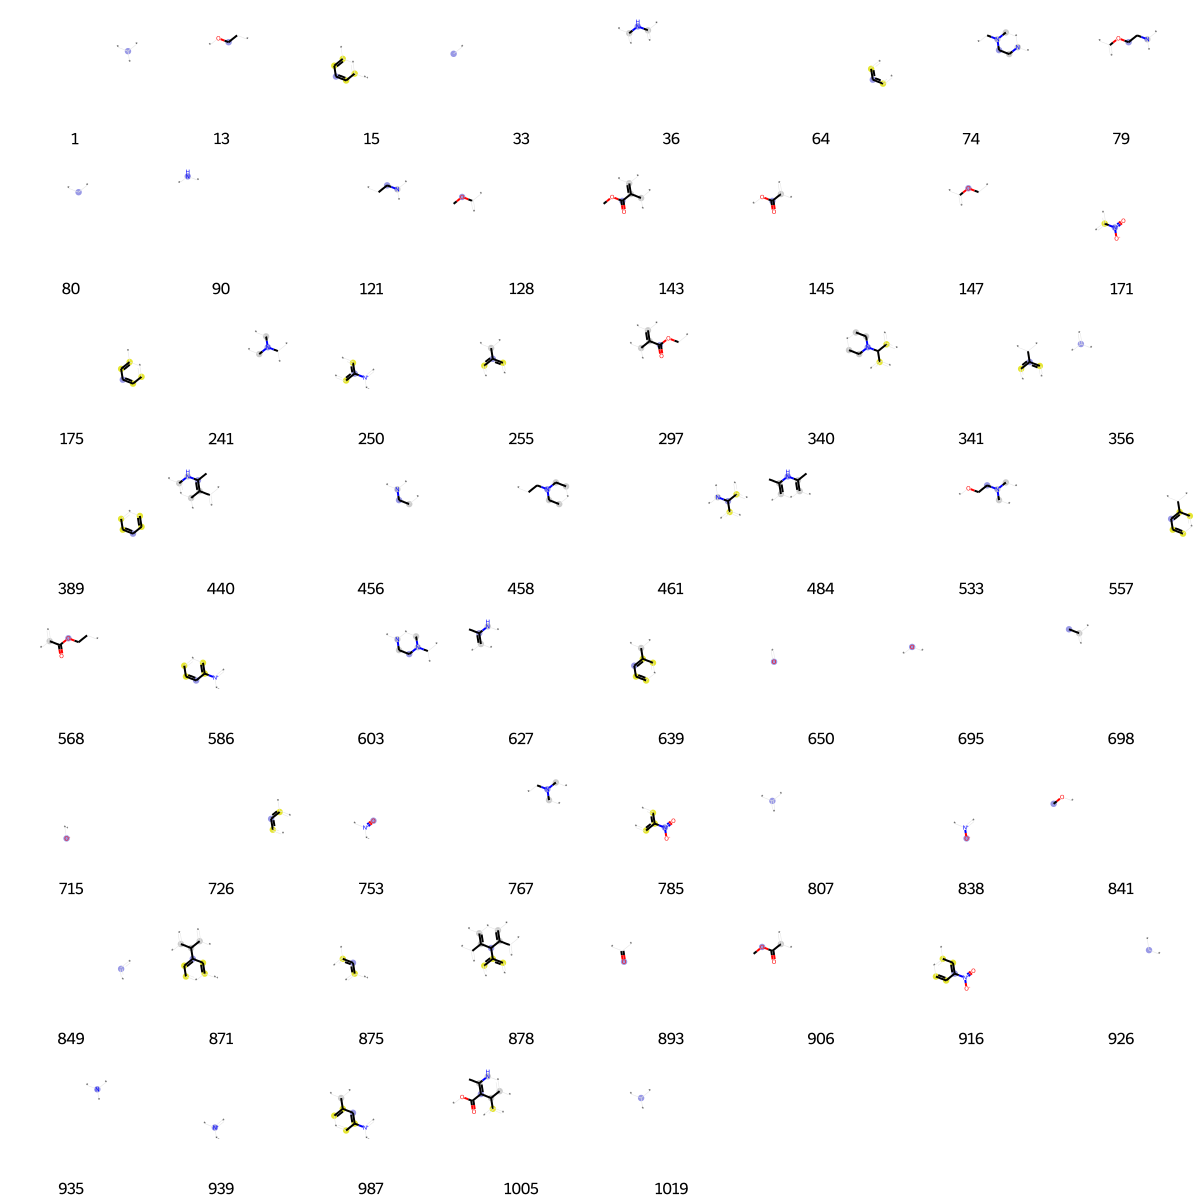

In [1681]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [1682]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[1,
 41,
 42,
 64,
 80,
 128,
 175,
 251,
 257,
 341,
 356,
 362,
 389,
 449,
 493,
 556,
 557,
 607,
 650,
 715,
 726,
 802,
 807,
 849,
 878,
 893,
 955,
 983,
 1001]

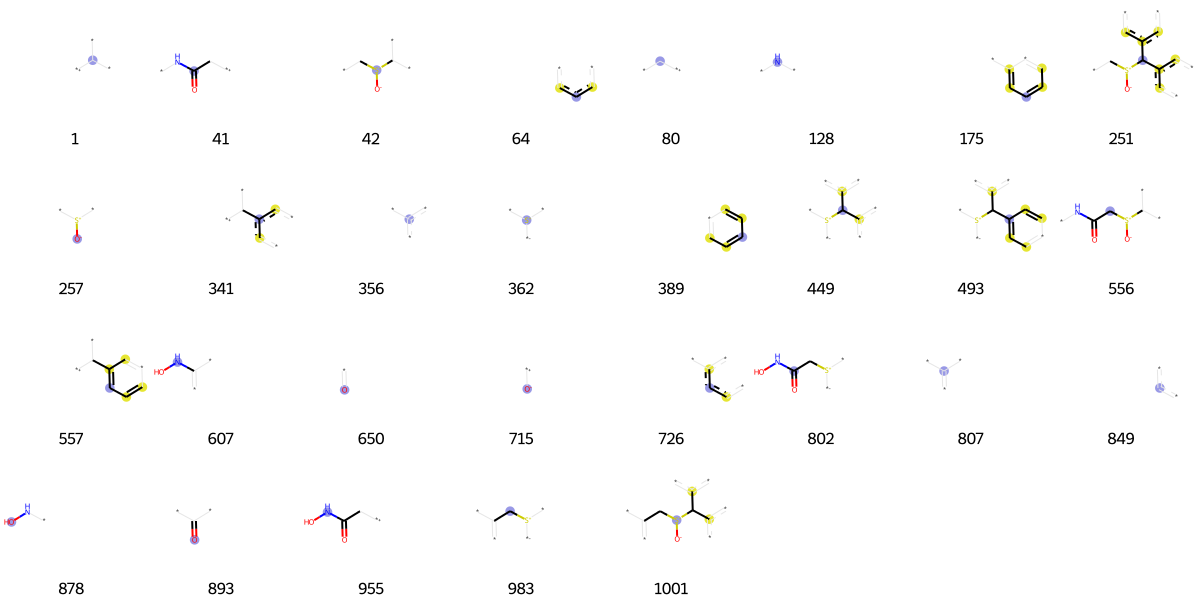

In [1683]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [1684]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[33,
 34,
 36,
 84,
 112,
 114,
 128,
 130,
 138,
 152,
 157,
 163,
 180,
 185,
 188,
 240,
 250,
 267,
 271,
 272,
 282,
 301,
 314,
 320,
 321,
 324,
 344,
 356,
 360,
 363,
 369,
 392,
 412,
 418,
 429,
 463,
 478,
 503,
 516,
 519,
 574,
 575,
 596,
 600,
 618,
 643,
 644,
 650,
 674,
 679,
 687,
 712,
 725,
 790,
 807,
 849,
 853,
 893,
 899,
 904,
 926,
 995,
 1010,
 1019]

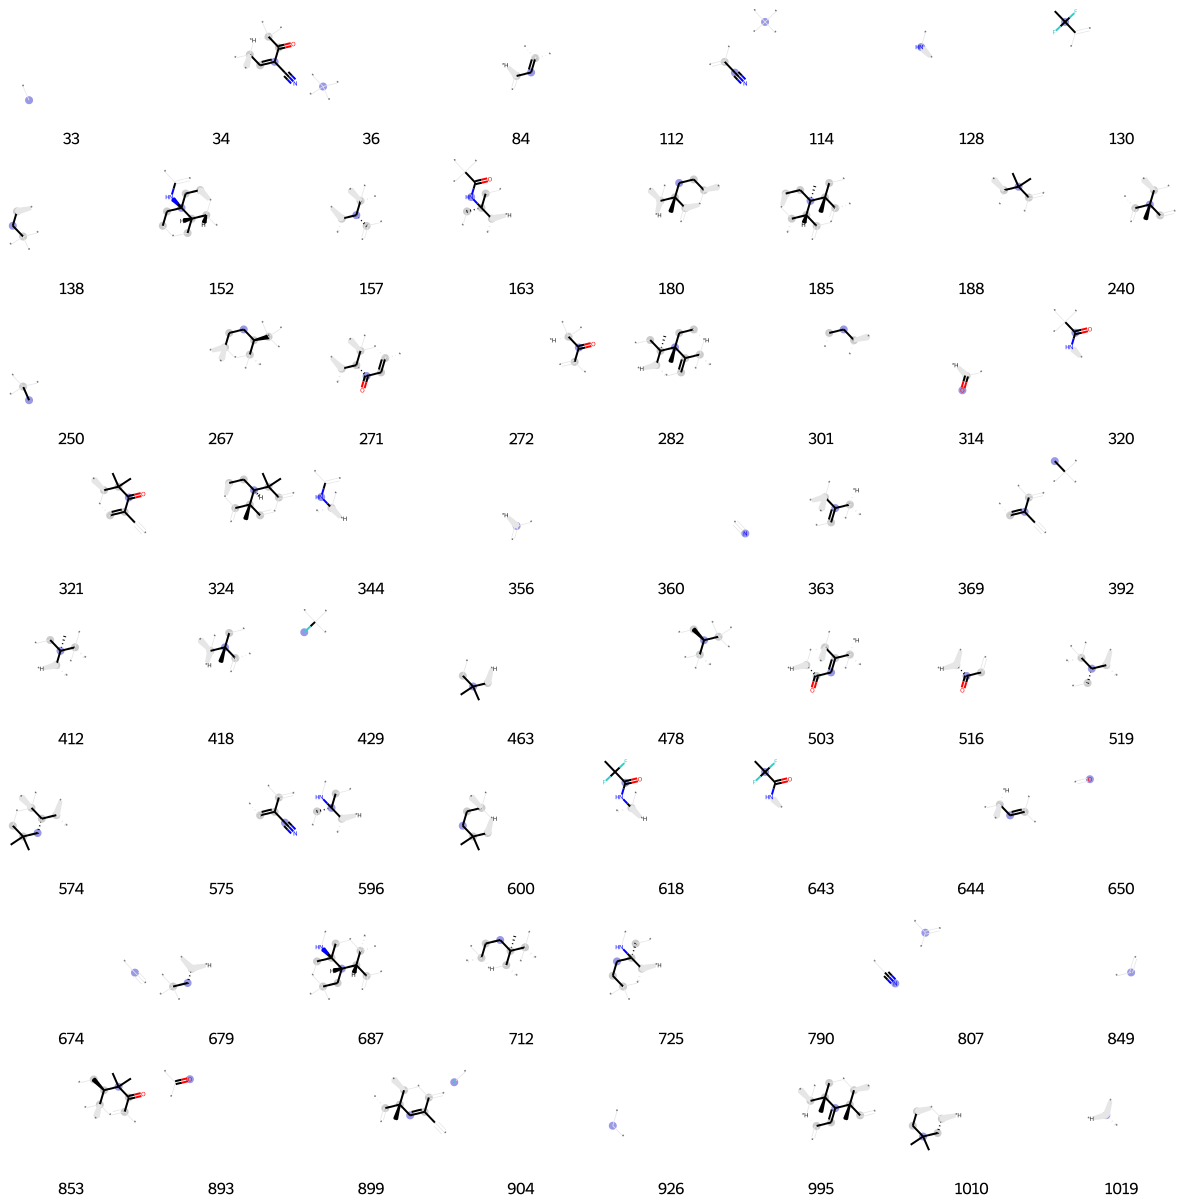

In [1685]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [1686]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[1,
 4,
 33,
 34,
 41,
 64,
 80,
 102,
 119,
 123,
 147,
 175,
 294,
 301,
 341,
 356,
 389,
 398,
 446,
 456,
 514,
 542,
 557,
 576,
 650,
 695,
 726,
 732,
 739,
 757,
 767,
 807,
 849,
 865,
 893,
 916,
 926,
 935,
 954,
 1019]

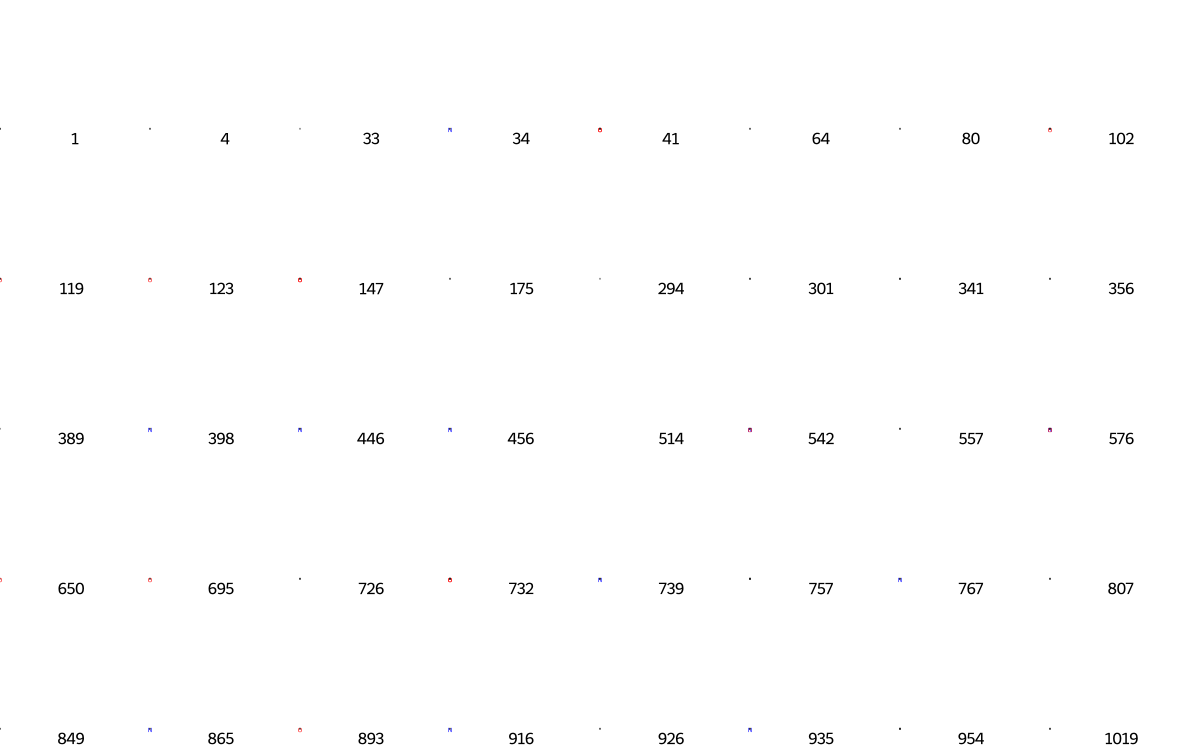

In [1687]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [1688]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[15,
 54,
 64,
 77,
 90,
 95,
 111,
 171,
 242,
 250,
 279,
 310,
 319,
 332,
 344,
 348,
 350,
 356,
 360,
 375,
 386,
 403,
 452,
 530,
 553,
 575,
 586,
 646,
 650,
 674,
 694,
 699,
 705,
 715,
 722,
 726,
 753,
 785,
 787,
 790,
 793,
 800,
 803,
 807,
 838,
 849,
 875,
 904,
 916,
 935,
 939,
 955]

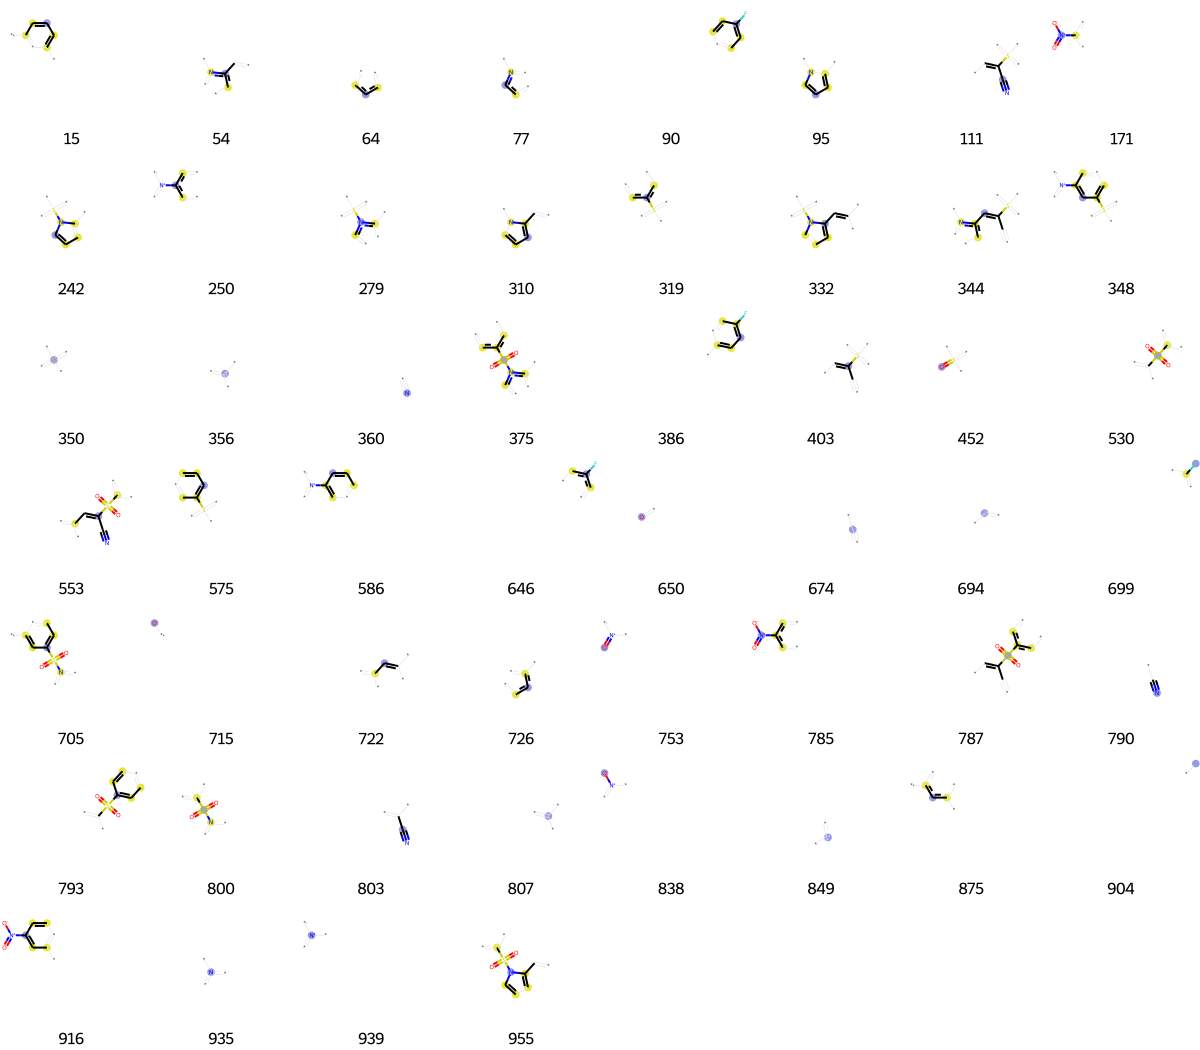

In [1689]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [1690]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[33,
 90,
 111,
 136,
 141,
 162,
 164,
 222,
 232,
 252,
 302,
 319,
 350,
 352,
 356,
 386,
 452,
 599,
 607,
 643,
 646,
 650,
 675,
 692,
 699,
 715,
 726,
 728,
 849,
 875,
 876,
 896,
 904,
 999]

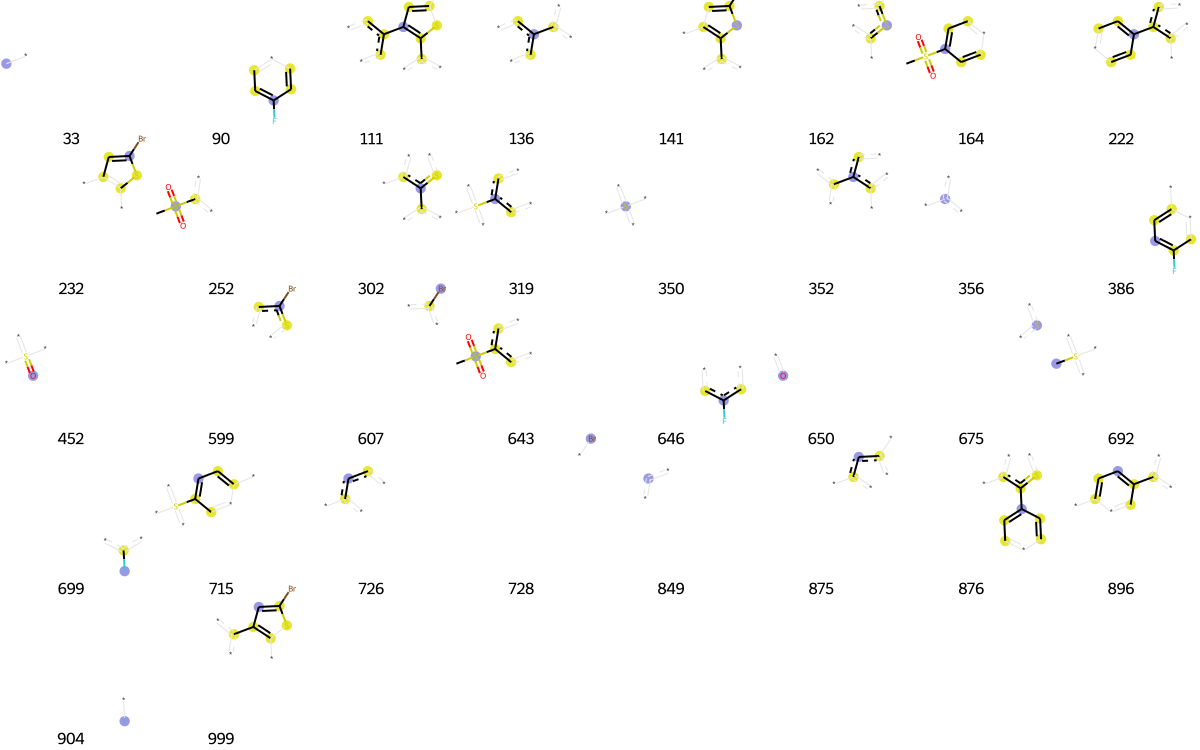

In [1691]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [1692]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1,
 64,
 69,
 80,
 83,
 114,
 116,
 147,
 175,
 356,
 380,
 389,
 393,
 403,
 592,
 624,
 642,
 650,
 726,
 786,
 807,
 820,
 825,
 849,
 856,
 893,
 993]

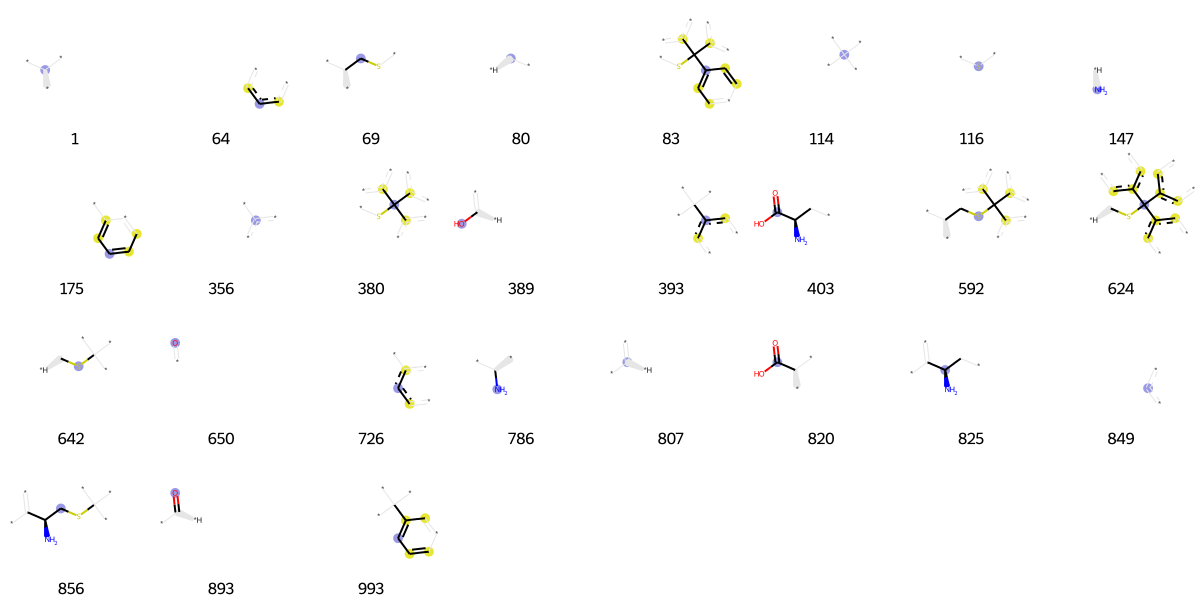

In [1693]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [1694]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[8,
 15,
 33,
 61,
 64,
 105,
 114,
 128,
 147,
 162,
 187,
 200,
 246,
 302,
 315,
 323,
 339,
 350,
 352,
 356,
 378,
 389,
 392,
 409,
 414,
 421,
 428,
 433,
 452,
 454,
 502,
 545,
 550,
 576,
 622,
 650,
 672,
 675,
 699,
 702,
 726,
 766,
 787,
 814,
 816,
 831,
 842,
 849,
 852,
 904,
 913,
 962,
 980,
 984,
 1008,
 1021]

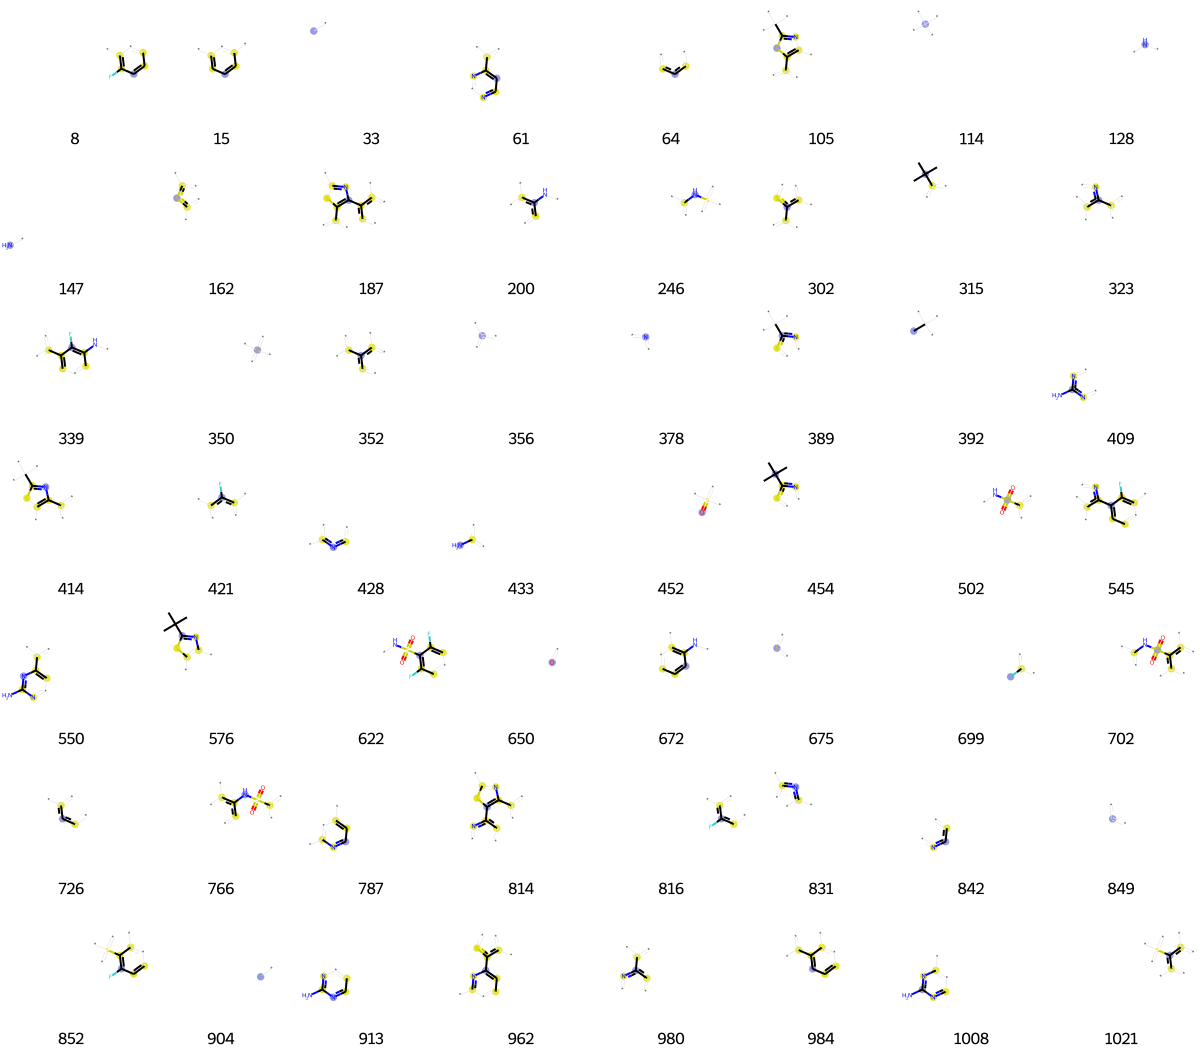

In [1695]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [1696]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[33,
 34,
 80,
 90,
 128,
 152,
 164,
 165,
 185,
 191,
 208,
 216,
 231,
 271,
 284,
 294,
 305,
 314,
 316,
 329,
 352,
 356,
 366,
 378,
 407,
 428,
 456,
 458,
 491,
 492,
 504,
 511,
 544,
 558,
 561,
 562,
 581,
 608,
 622,
 650,
 654,
 659,
 672,
 680,
 699,
 726,
 770,
 802,
 804,
 816,
 831,
 843,
 849,
 850,
 875,
 876,
 891,
 904,
 906,
 910,
 926,
 935,
 996,
 997]

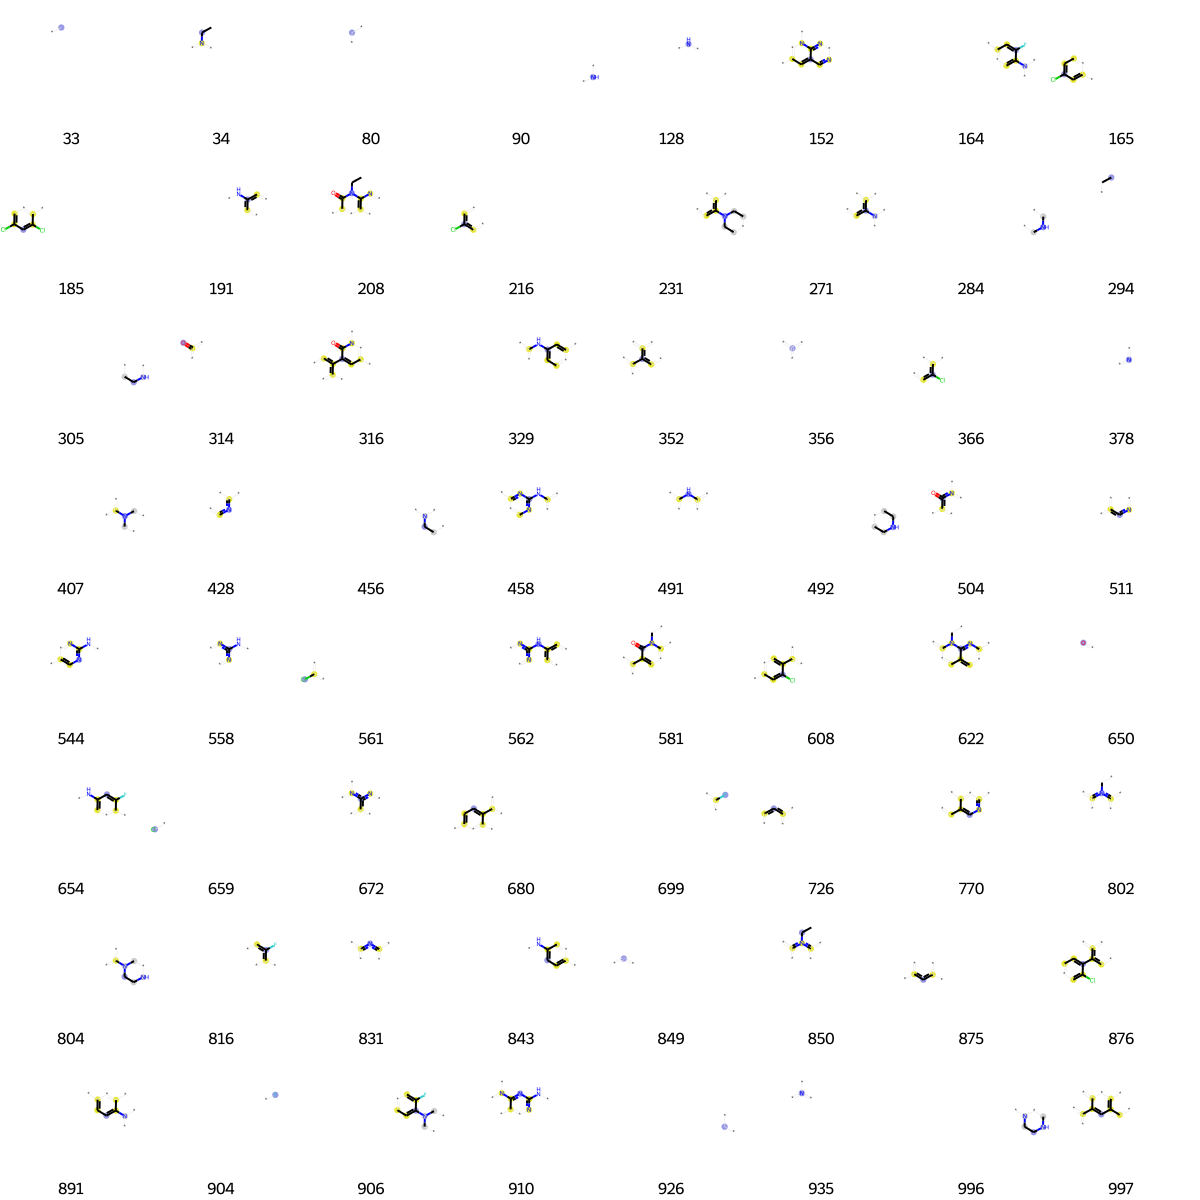

In [1697]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [1698]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[1,
 33,
 41,
 42,
 64,
 79,
 80,
 86,
 117,
 128,
 147,
 175,
 197,
 283,
 289,
 310,
 356,
 389,
 416,
 458,
 551,
 573,
 578,
 592,
 600,
 650,
 667,
 680,
 684,
 691,
 726,
 730,
 736,
 745,
 754,
 759,
 786,
 805,
 807,
 820,
 823,
 825,
 849,
 857,
 875,
 890,
 893,
 966,
 977,
 982,
 989,
 992,
 1017]

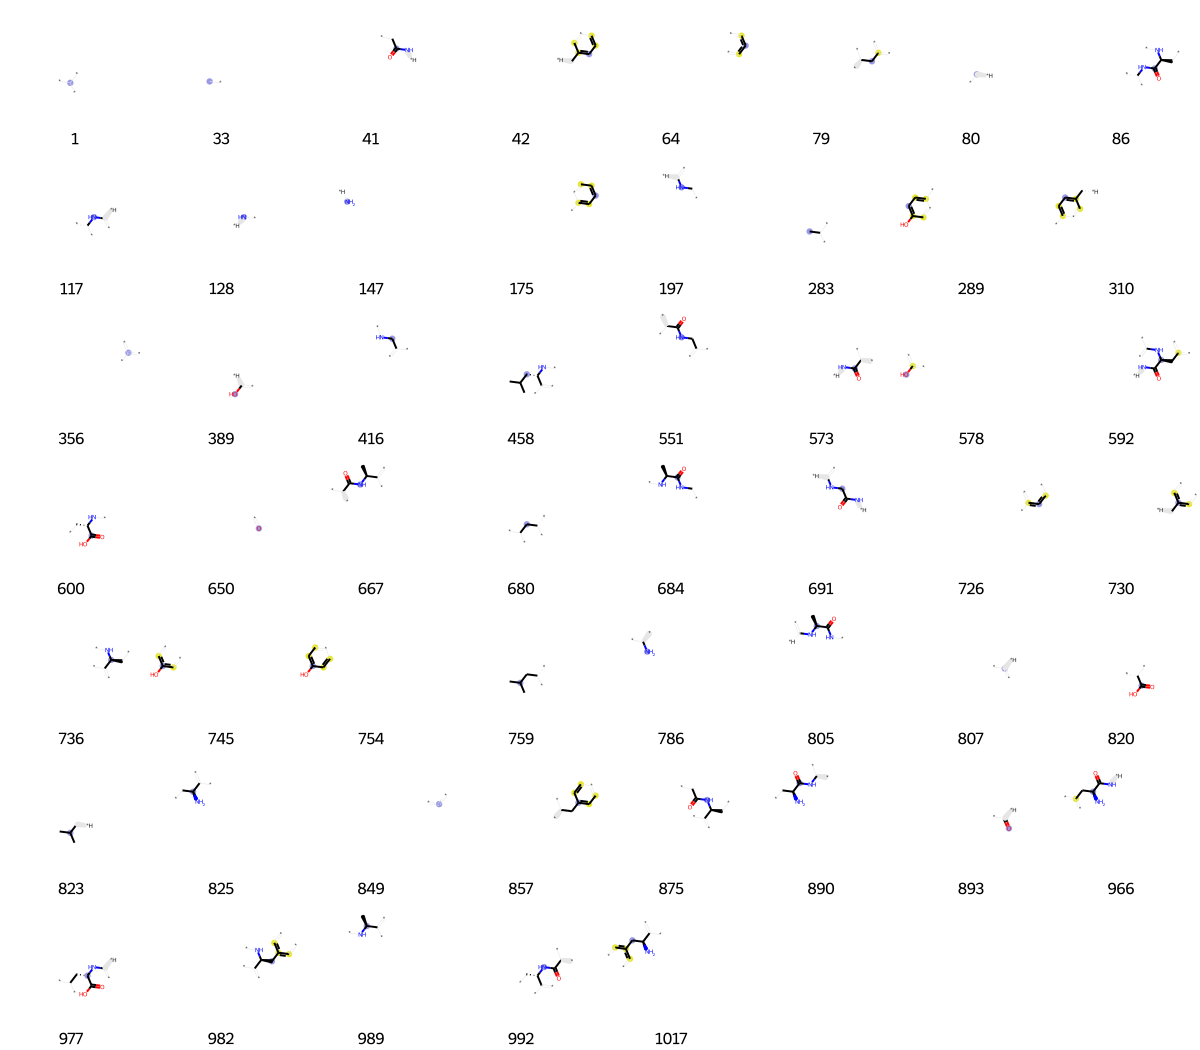

In [1699]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [1700]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[1,
 42,
 64,
 79,
 80,
 117,
 121,
 128,
 162,
 175,
 266,
 333,
 356,
 386,
 389,
 411,
 425,
 463,
 480,
 486,
 561,
 600,
 646,
 650,
 659,
 675,
 699,
 709,
 726,
 730,
 736,
 781,
 807,
 809,
 820,
 849,
 851,
 857,
 875,
 885,
 893,
 904,
 905,
 954,
 982,
 1011]

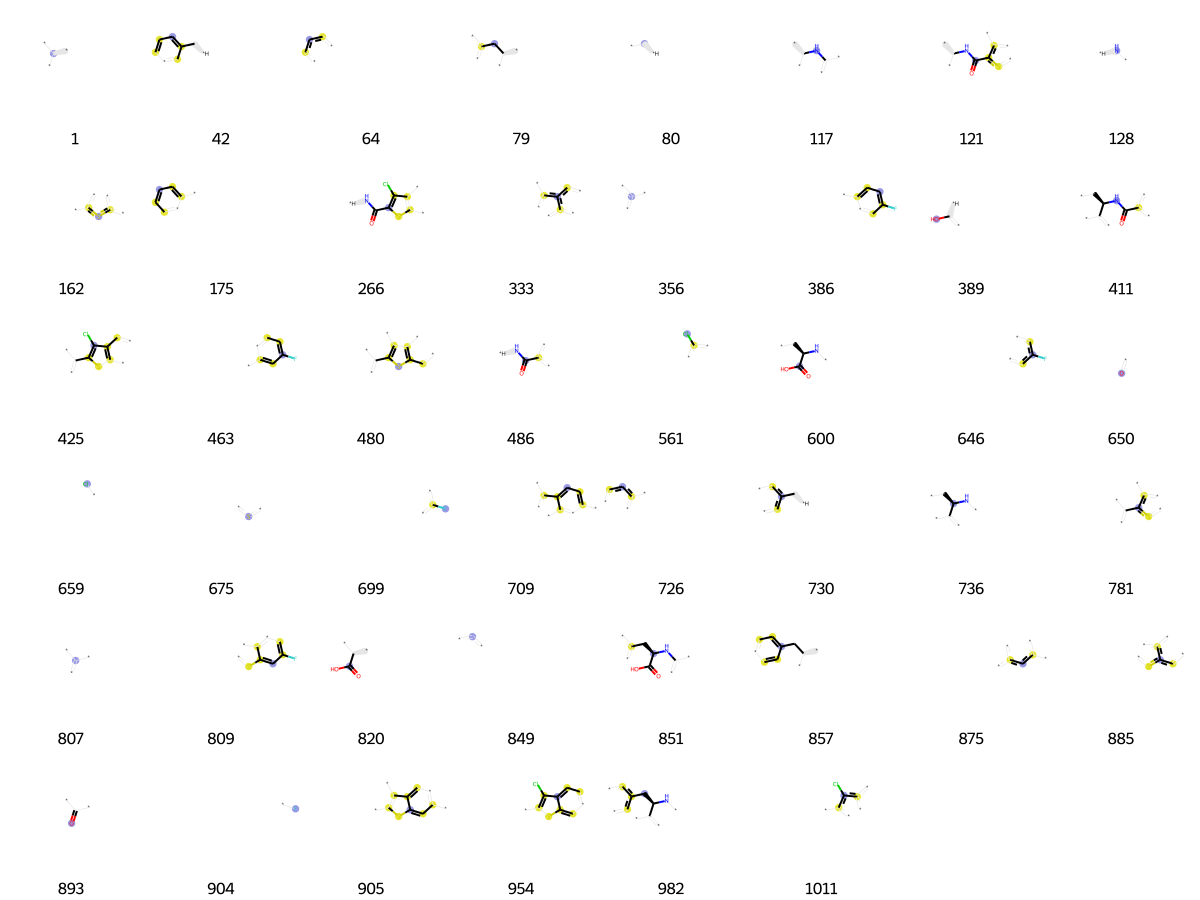

In [1701]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [1702]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[47,
 81,
 90,
 97,
 314,
 339,
 356,
 482,
 494,
 587,
 650,
 679,
 693,
 711,
 721,
 726,
 806,
 849,
 871]

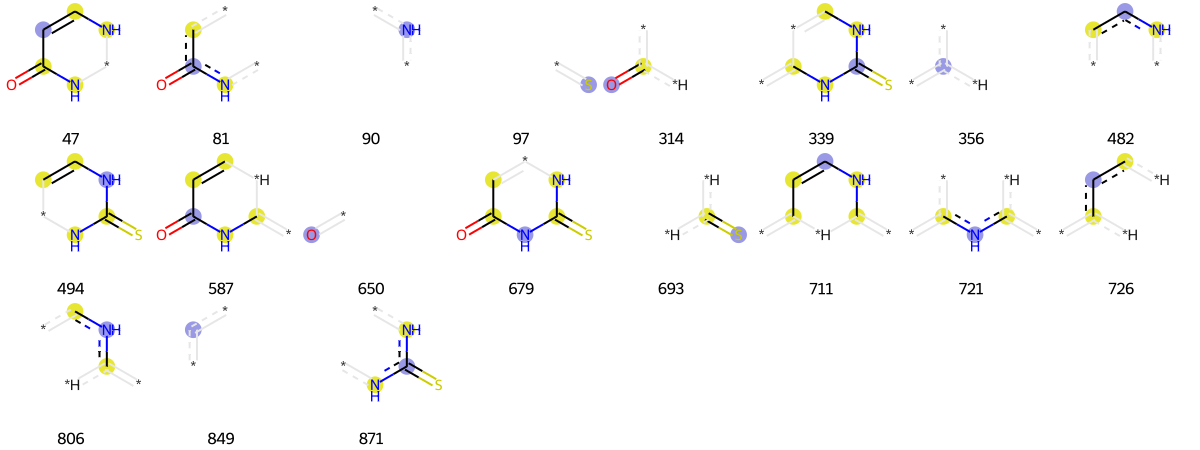

In [1703]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [1704]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[15,
 33,
 64,
 104,
 121,
 147,
 175,
 249,
 275,
 314,
 333,
 352,
 356,
 365,
 368,
 386,
 433,
 472,
 512,
 549,
 580,
 630,
 650,
 656,
 666,
 695,
 726,
 760,
 768,
 784,
 841,
 849,
 875,
 920,
 932,
 943,
 946,
 984]

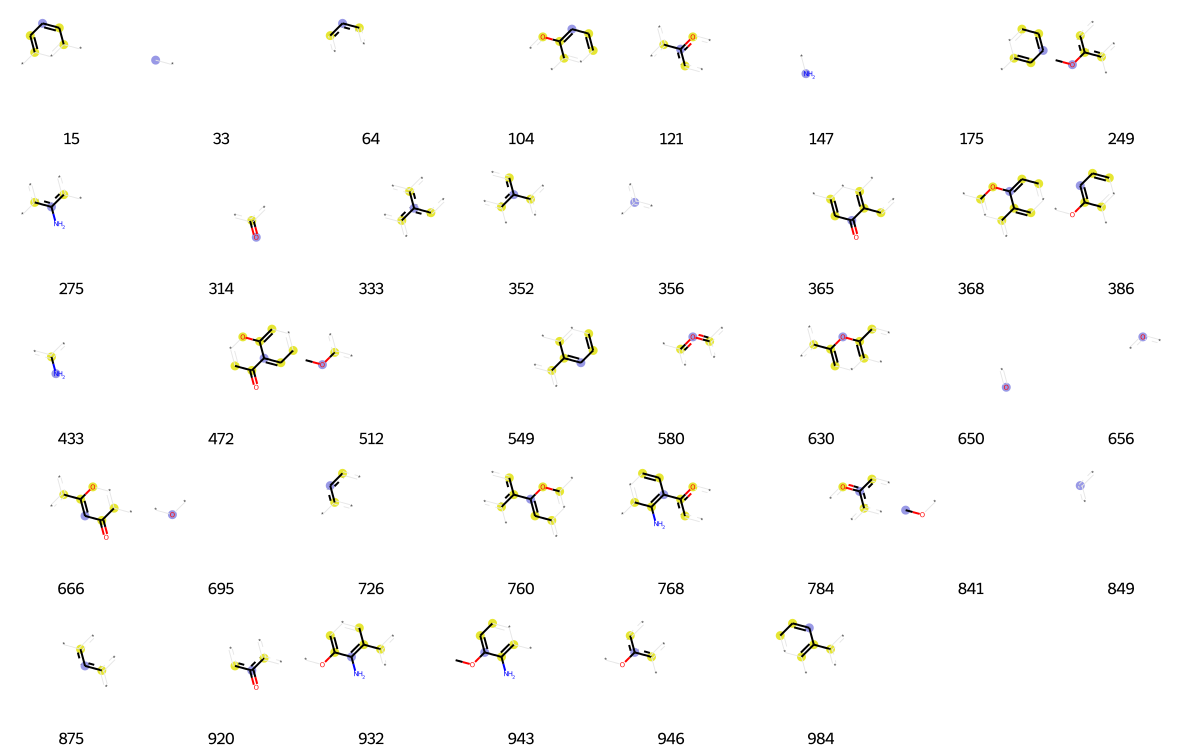

In [1705]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [1706]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[42,
 64,
 80,
 90,
 128,
 147,
 175,
 255,
 298,
 343,
 356,
 378,
 389,
 392,
 428,
 488,
 489,
 614,
 638,
 700,
 708,
 713,
 726,
 730,
 786,
 806,
 834,
 849,
 859,
 933,
 980,
 983]

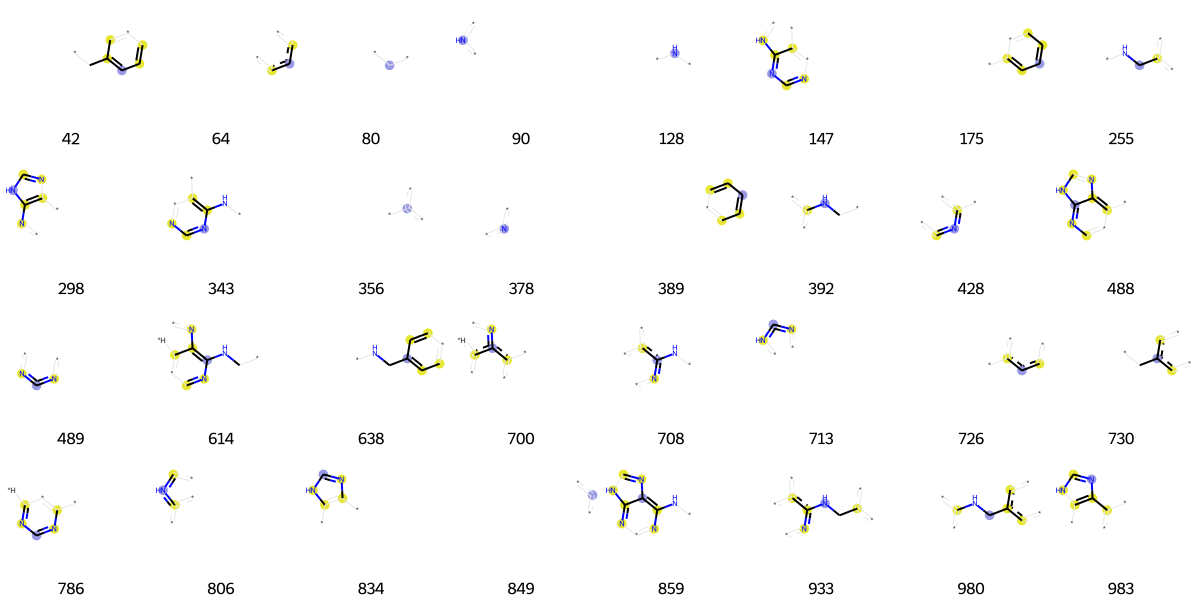

In [1707]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [1708]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[1,
 33,
 80,
 128,
 216,
 227,
 315,
 338,
 341,
 343,
 356,
 387,
 389,
 406,
 410,
 451,
 578,
 583,
 589,
 605,
 606,
 632,
 650,
 726,
 760,
 807,
 820,
 829,
 844,
 849,
 875,
 893,
 971]

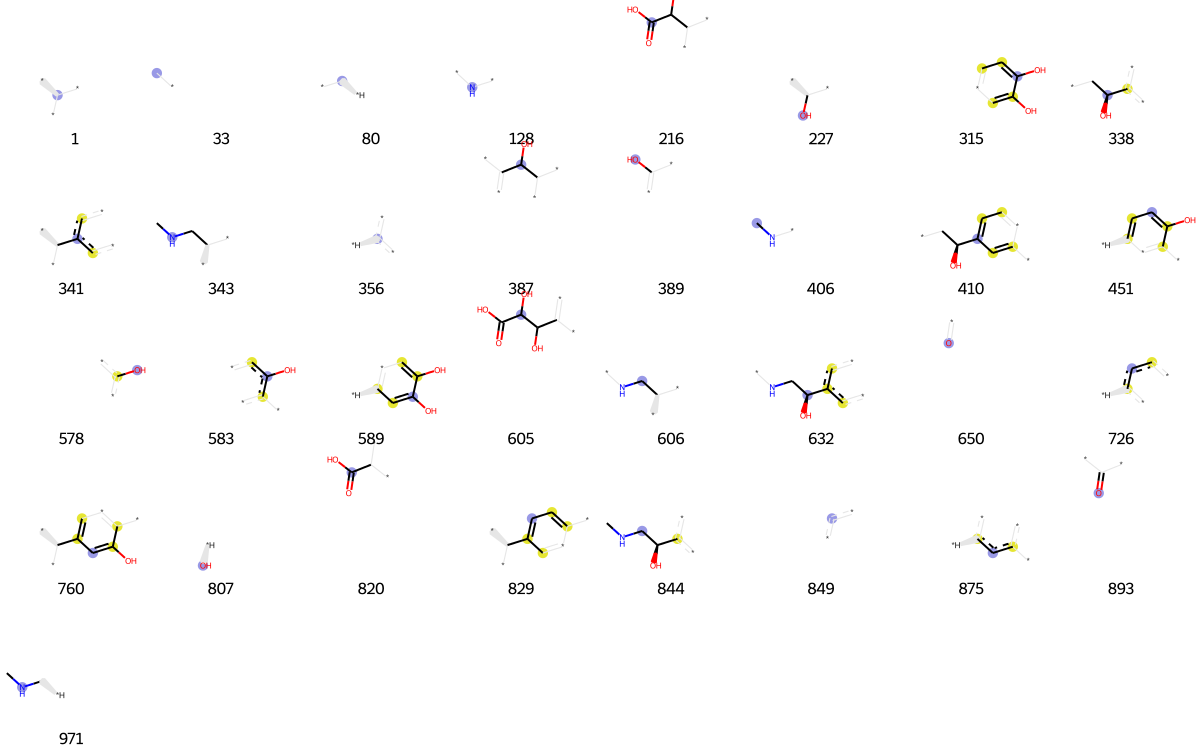

In [1709]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [1710]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[8,
 33,
 48,
 105,
 116,
 121,
 140,
 171,
 281,
 294,
 296,
 356,
 378,
 385,
 428,
 481,
 493,
 519,
 552,
 583,
 650,
 692,
 708,
 715,
 747,
 753,
 796,
 838,
 849,
 861,
 932,
 935,
 939,
 962]

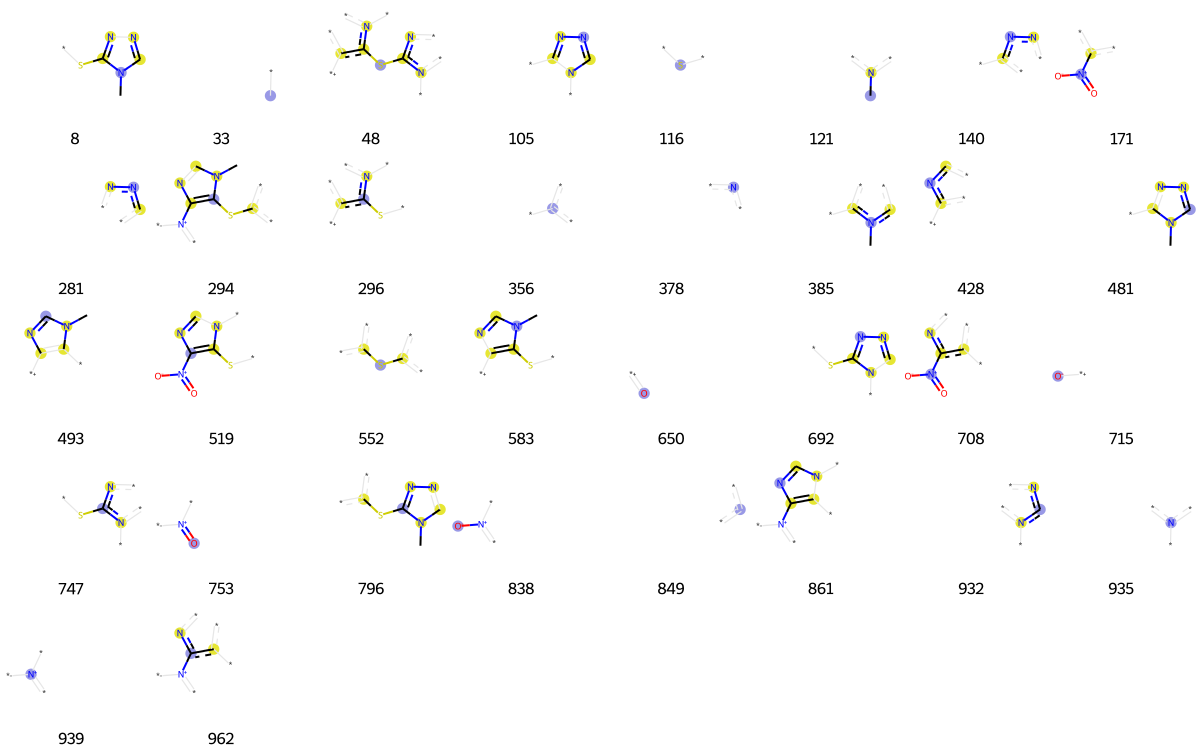

In [1711]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [1712]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[4,
 12,
 13,
 74,
 80,
 94,
 104,
 122,
 128,
 147,
 158,
 171,
 200,
 222,
 236,
 304,
 314,
 325,
 328,
 345,
 356,
 381,
 385,
 421,
 447,
 459,
 470,
 473,
 475,
 486,
 491,
 570,
 586,
 598,
 650,
 656,
 661,
 686,
 695,
 699,
 701,
 703,
 714,
 726,
 741,
 768,
 798,
 807,
 816,
 832,
 836,
 849,
 851,
 863,
 875,
 891,
 893,
 904,
 926,
 935,
 947,
 950,
 967]

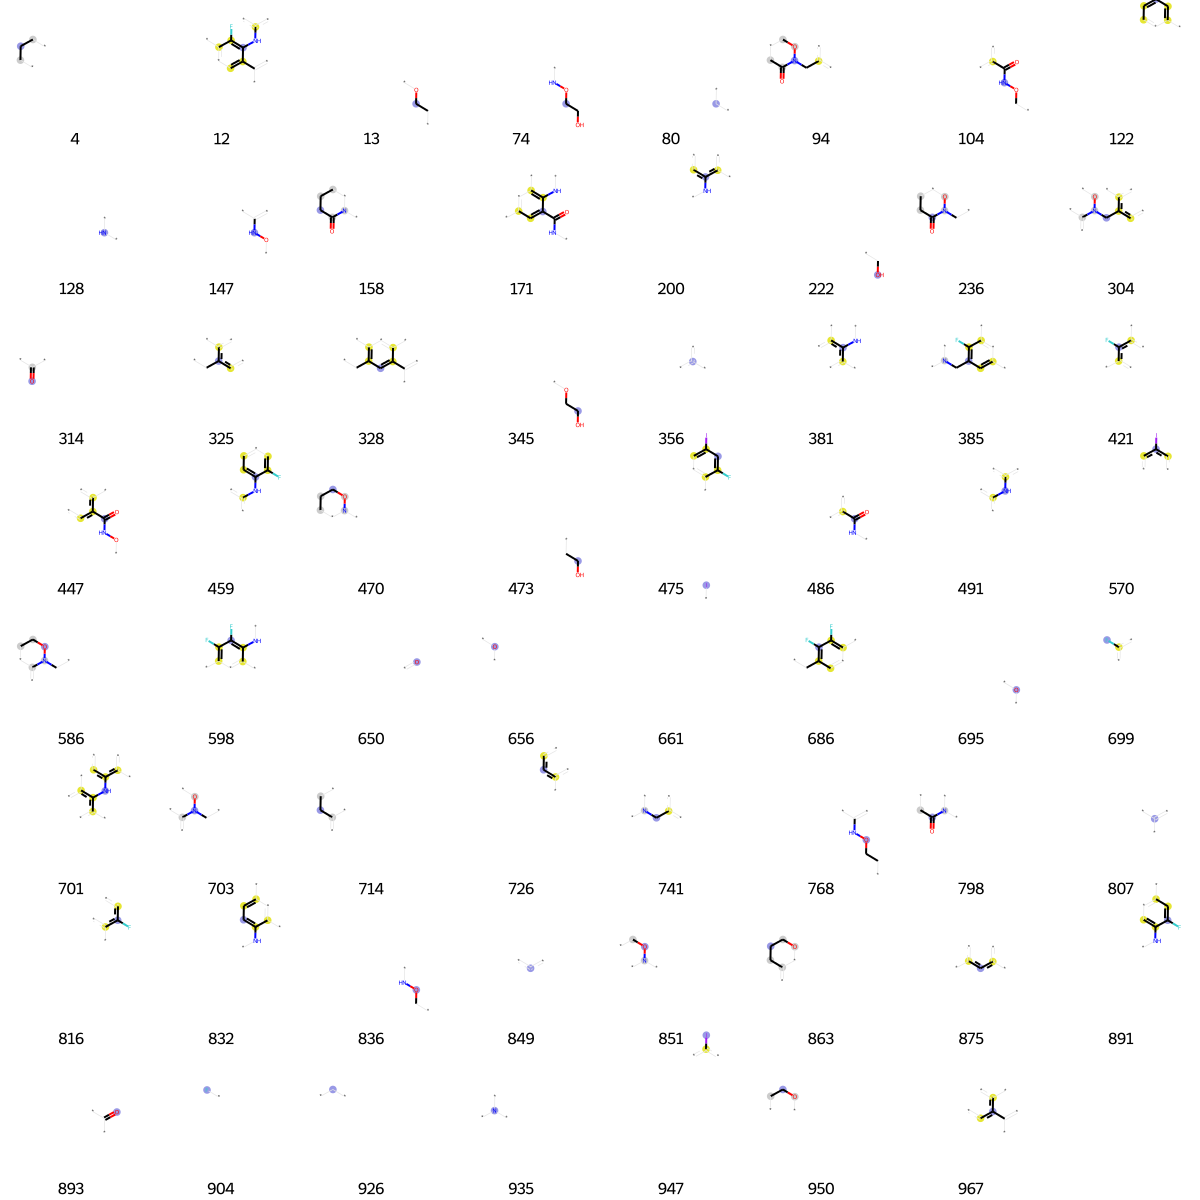

In [1713]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [1714]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[4,
 26,
 33,
 39,
 90,
 94,
 119,
 122,
 123,
 140,
 227,
 231,
 233,
 249,
 255,
 273,
 281,
 301,
 314,
 356,
 397,
 470,
 512,
 524,
 551,
 650,
 695,
 726,
 779,
 841,
 842,
 849,
 867,
 875,
 883,
 890,
 926,
 946,
 976,
 1019]

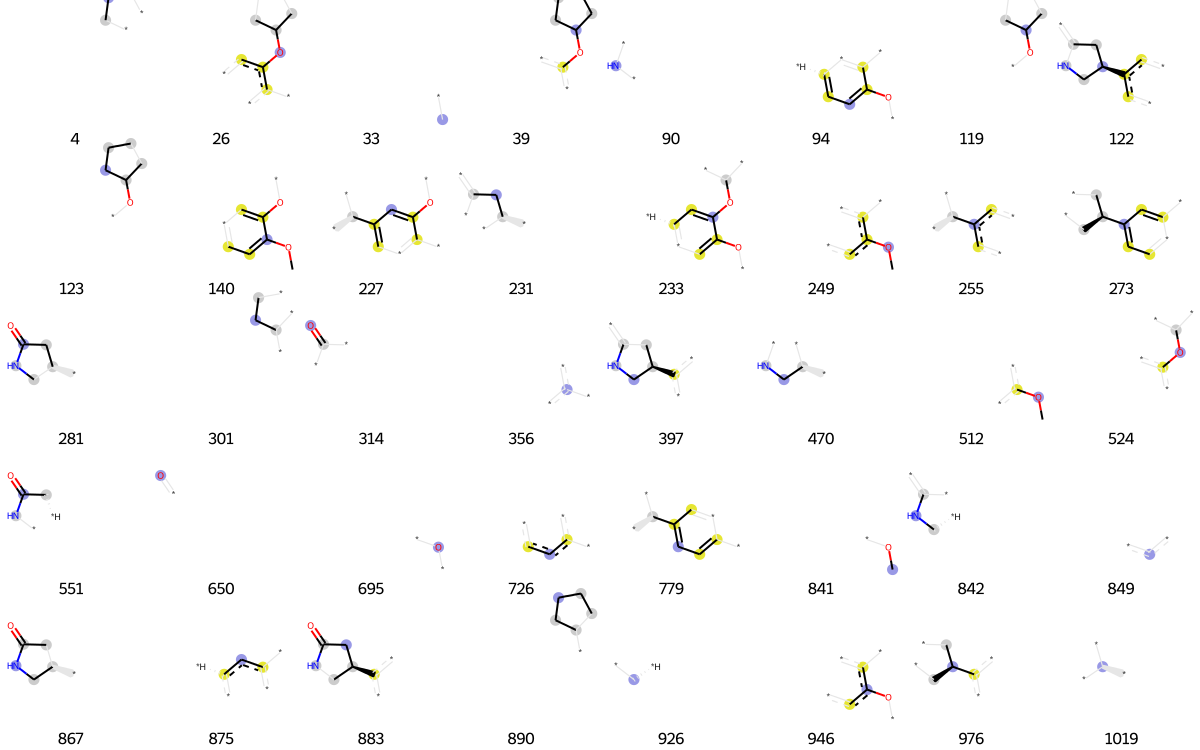

In [1715]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [1716]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[33,
 46,
 63,
 80,
 85,
 136,
 202,
 207,
 214,
 216,
 294,
 323,
 325,
 327,
 349,
 356,
 367,
 378,
 418,
 464,
 471,
 486,
 561,
 650,
 659,
 678,
 726,
 737,
 794,
 799,
 807,
 816,
 819,
 831,
 849,
 881,
 890,
 893,
 896,
 927,
 928,
 935,
 945,
 978]

In [1717]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[11,
 33,
 39,
 137,
 156,
 198,
 203,
 270,
 325,
 333,
 350,
 356,
 360,
 430,
 441,
 463,
 511,
 597,
 656,
 673,
 679,
 687,
 709,
 711,
 726,
 738,
 776,
 831,
 836,
 839,
 842,
 849,
 875,
 881,
 926,
 997,
 998,
 1002]

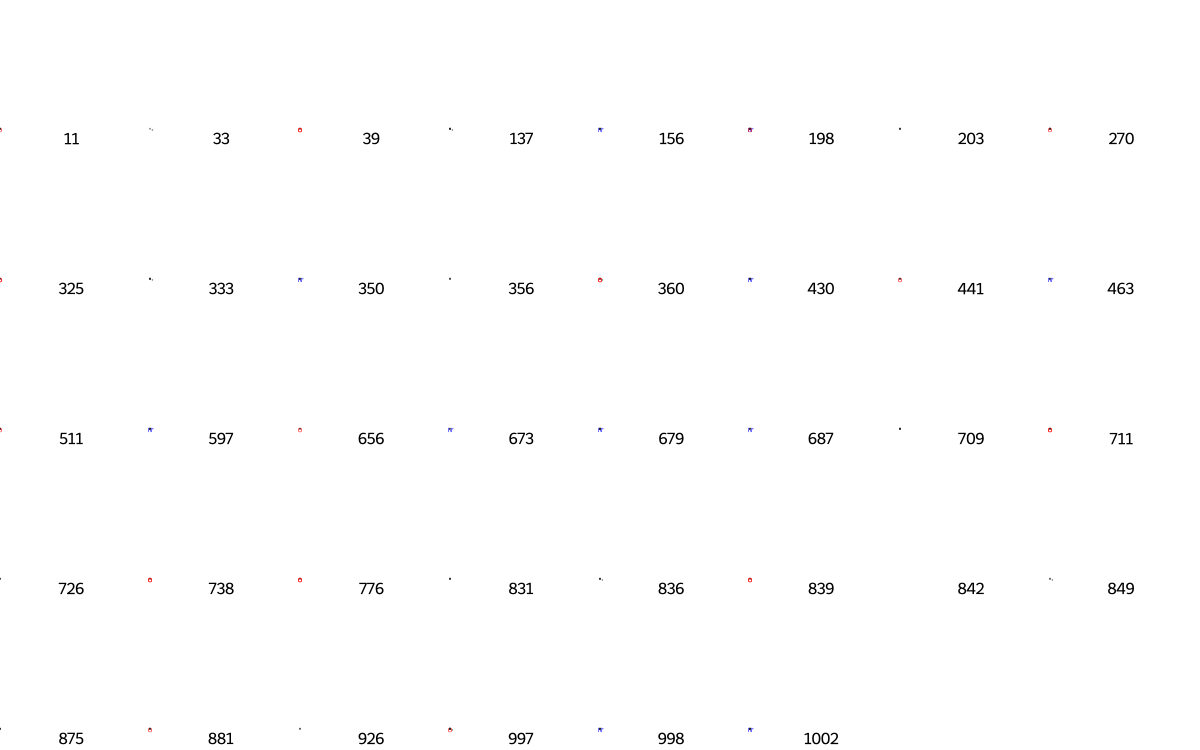

In [1718]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [1719]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[2,
 4,
 62,
 102,
 128,
 130,
 162,
 185,
 216,
 226,
 231,
 301,
 310,
 317,
 323,
 334,
 335,
 336,
 347,
 356,
 361,
 366,
 378,
 385,
 389,
 407,
 410,
 428,
 440,
 448,
 456,
 469,
 484,
 486,
 489,
 511,
 527,
 538,
 543,
 547,
 552,
 558,
 561,
 624,
 650,
 659,
 675,
 712,
 744,
 771,
 774,
 792,
 807,
 813,
 830,
 831,
 849,
 875,
 879,
 886,
 890,
 893,
 926,
 935,
 969,
 974,
 976,
 1019]

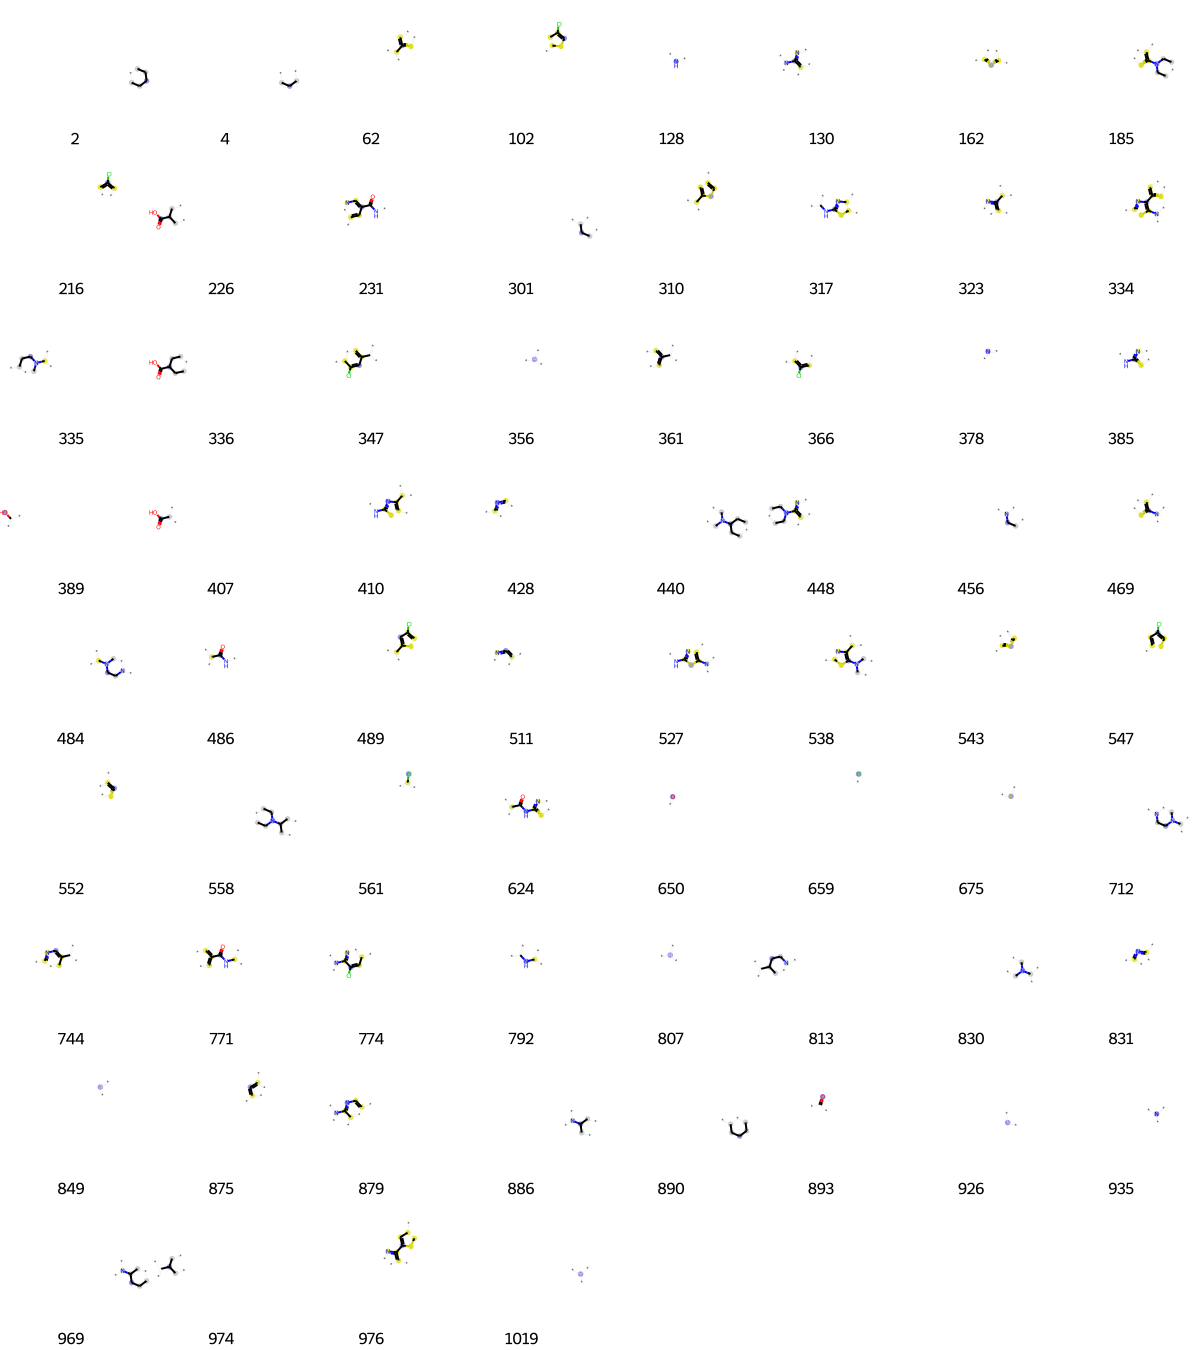

In [1720]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [1721]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[1,
 33,
 53,
 75,
 80,
 108,
 114,
 128,
 145,
 147,
 152,
 178,
 191,
 197,
 209,
 233,
 283,
 312,
 315,
 356,
 378,
 379,
 392,
 393,
 425,
 428,
 433,
 435,
 452,
 454,
 463,
 464,
 473,
 488,
 489,
 532,
 546,
 548,
 577,
 607,
 610,
 641,
 648,
 650,
 656,
 667,
 672,
 715,
 726,
 728,
 786,
 792,
 807,
 820,
 833,
 834,
 843,
 845,
 849,
 852,
 881,
 887,
 893,
 897,
 927,
 935,
 960,
 965,
 966,
 970,
 1001,
 1019]

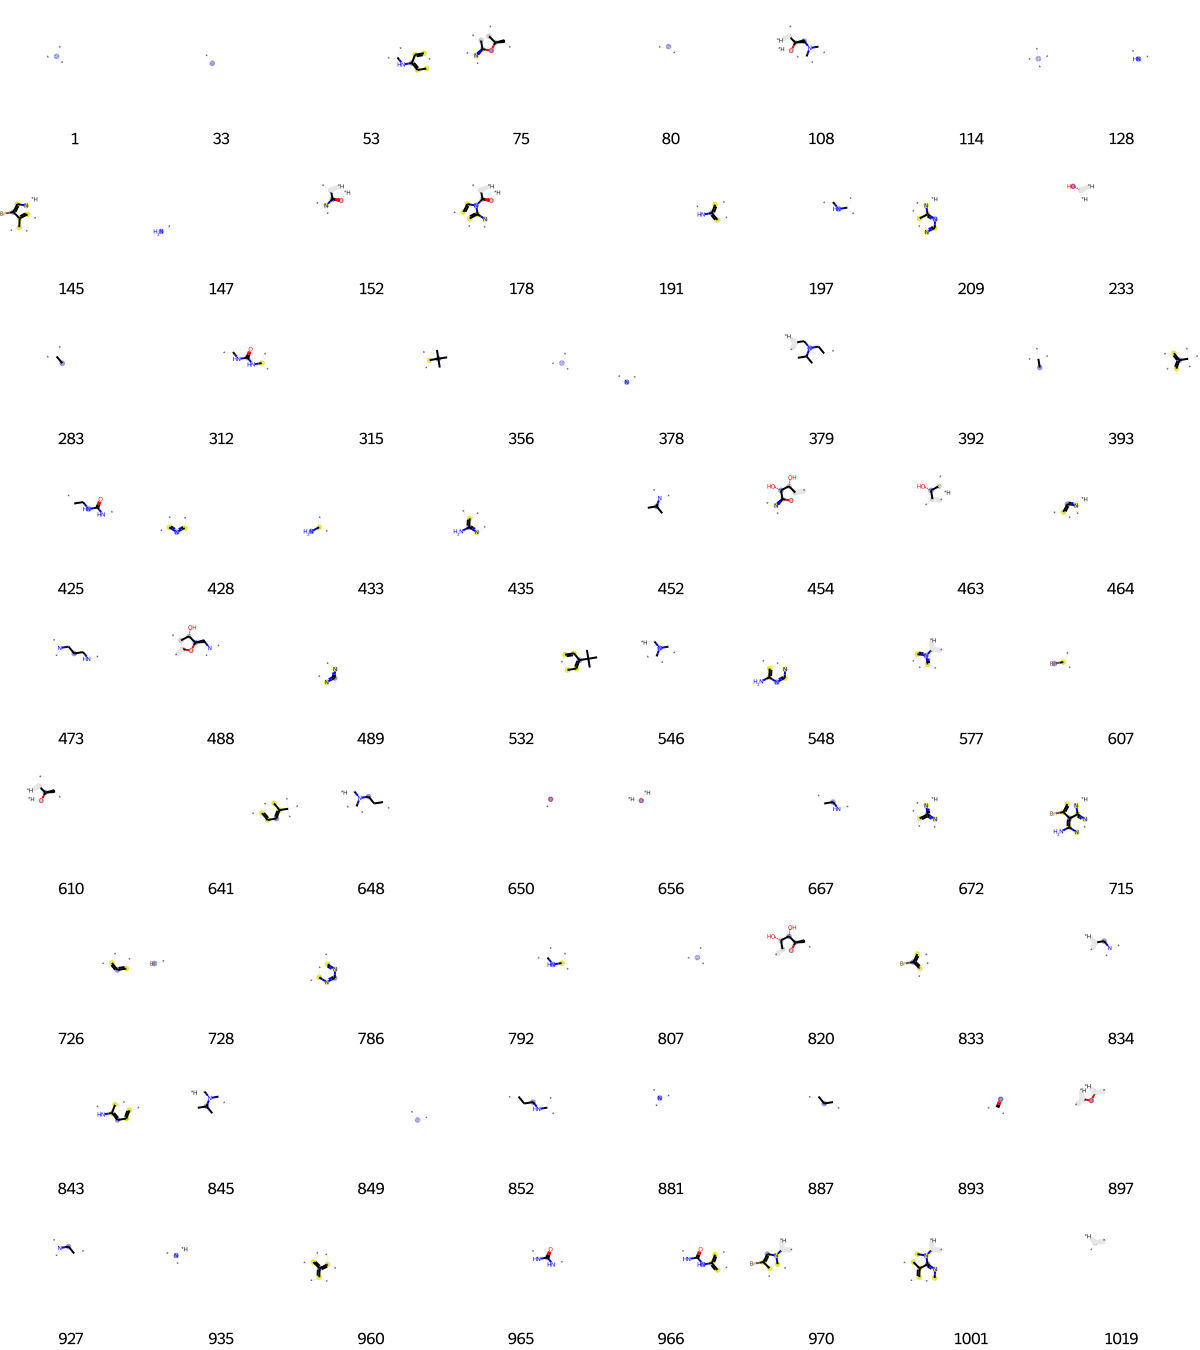

In [1722]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [1723]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[4,
 15,
 33,
 39,
 64,
 114,
 117,
 212,
 271,
 314,
 333,
 356,
 367,
 416,
 456,
 472,
 549,
 556,
 650,
 684,
 698,
 714,
 726,
 734,
 808,
 849,
 875,
 926,
 928,
 935,
 974,
 987,
 1012]

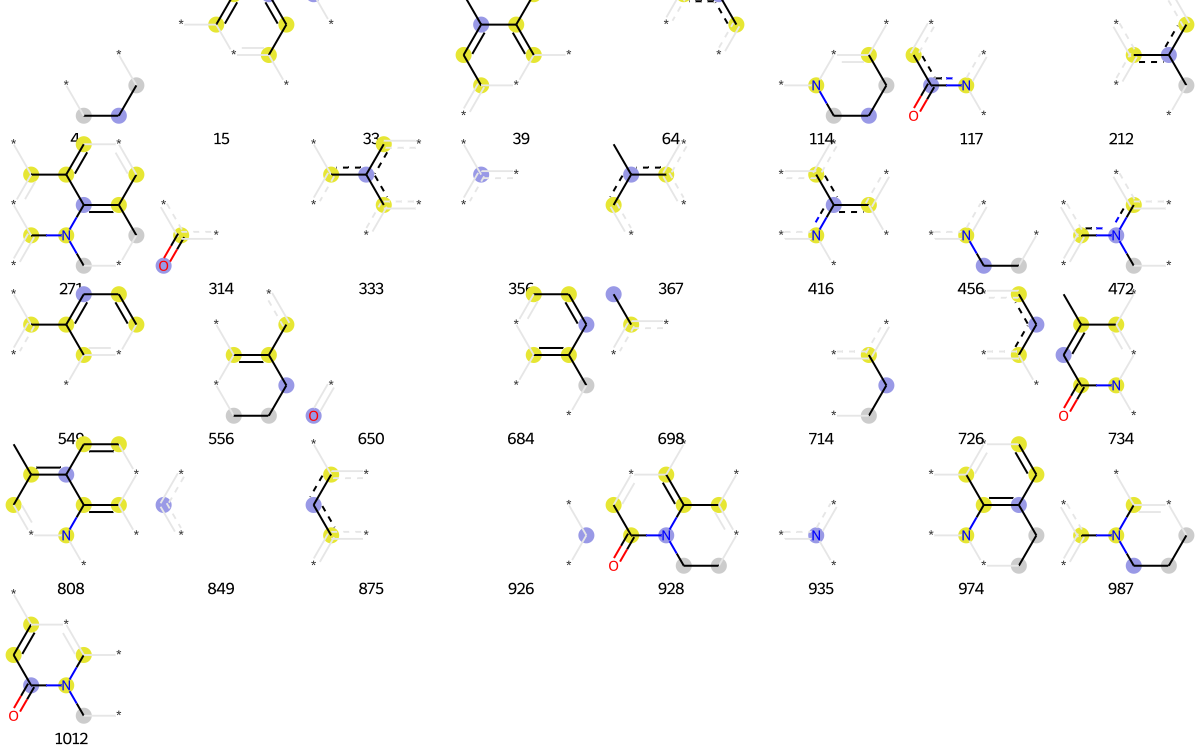

In [1724]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [1725]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[2,
 29,
 36,
 46,
 80,
 87,
 90,
 128,
 130,
 138,
 147,
 149,
 216,
 286,
 310,
 333,
 338,
 356,
 378,
 407,
 428,
 448,
 456,
 479,
 482,
 489,
 504,
 561,
 567,
 659,
 710,
 711,
 726,
 730,
 786,
 789,
 806,
 816,
 824,
 849,
 926,
 935,
 1009]

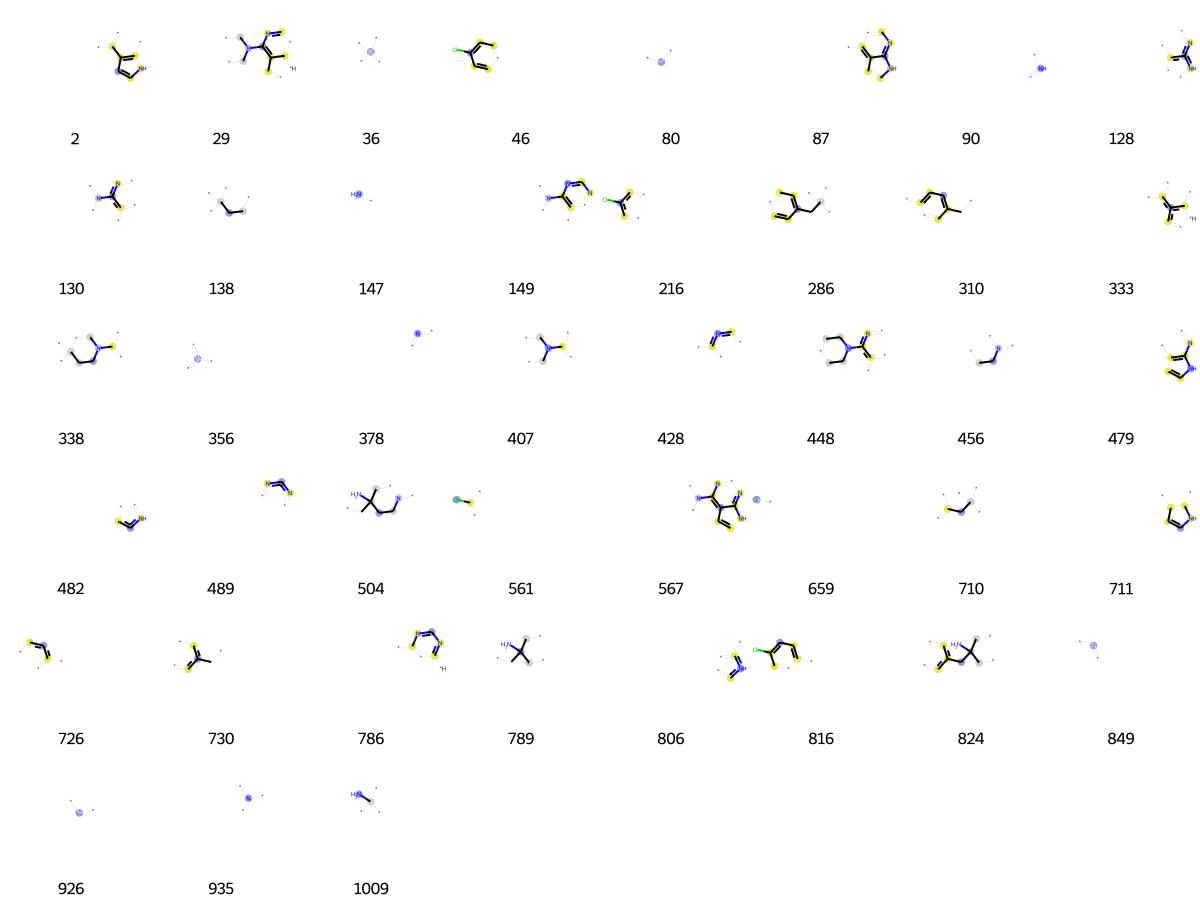

In [1726]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [1727]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[1,
 33,
 79,
 80,
 90,
 121,
 147,
 283,
 356,
 378,
 428,
 539,
 567,
 575,
 609,
 625,
 713,
 724,
 734,
 786,
 849,
 855,
 874,
 931]

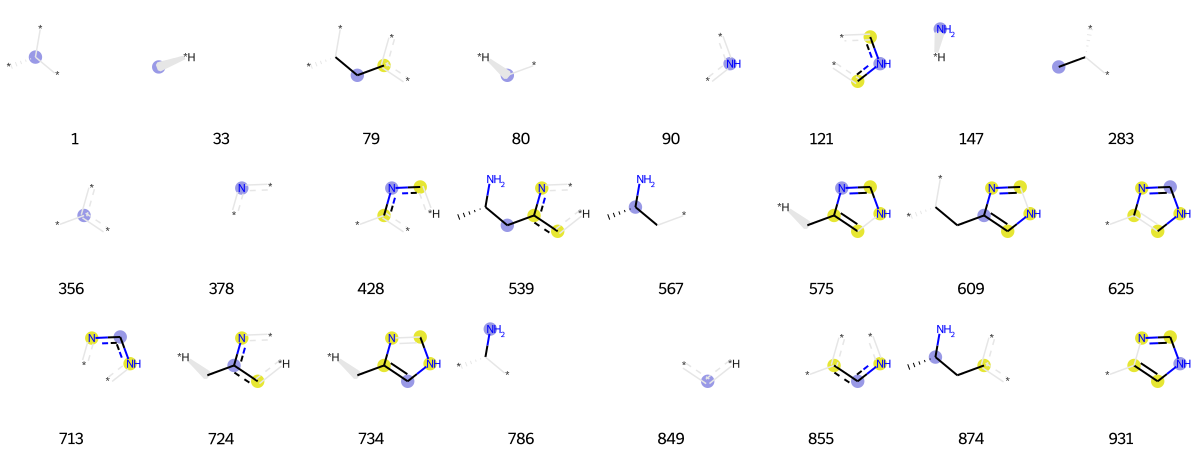

In [1728]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [1729]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[1,
 3,
 8,
 10,
 11,
 13,
 29,
 33,
 41,
 44,
 63,
 80,
 87,
 90,
 99,
 105,
 119,
 128,
 139,
 144,
 155,
 162,
 164,
 167,
 190,
 194,
 197,
 210,
 221,
 222,
 231,
 233,
 243,
 255,
 259,
 283,
 299,
 301,
 314,
 326,
 333,
 352,
 353,
 356,
 366,
 387,
 389,
 392,
 398,
 406,
 407,
 416,
 424,
 451,
 461,
 463,
 473,
 475,
 489,
 492,
 524,
 540,
 542,
 548,
 551,
 561,
 565,
 569,
 577,
 578,
 583,
 590,
 593,
 606,
 610,
 632,
 648,
 650,
 652,
 656,
 659,
 667,
 678,
 689,
 693,
 694,
 695,
 696,
 704,
 705,
 706,
 713,
 716,
 721,
 723,
 726,
 727,
 729,
 731,
 739,
 740,
 745,
 754,
 759,
 779,
 783,
 784,
 786,
 807,
 820,
 823,
 824,
 826,
 836,
 840,
 849,
 852,
 855,
 867,
 869,
 875,
 881,
 886,
 887,
 891,
 893,
 897,
 898,
 913,
 926,
 927,
 939,
 946,
 953,
 955,
 960,
 1002,
 1011,
 1019]

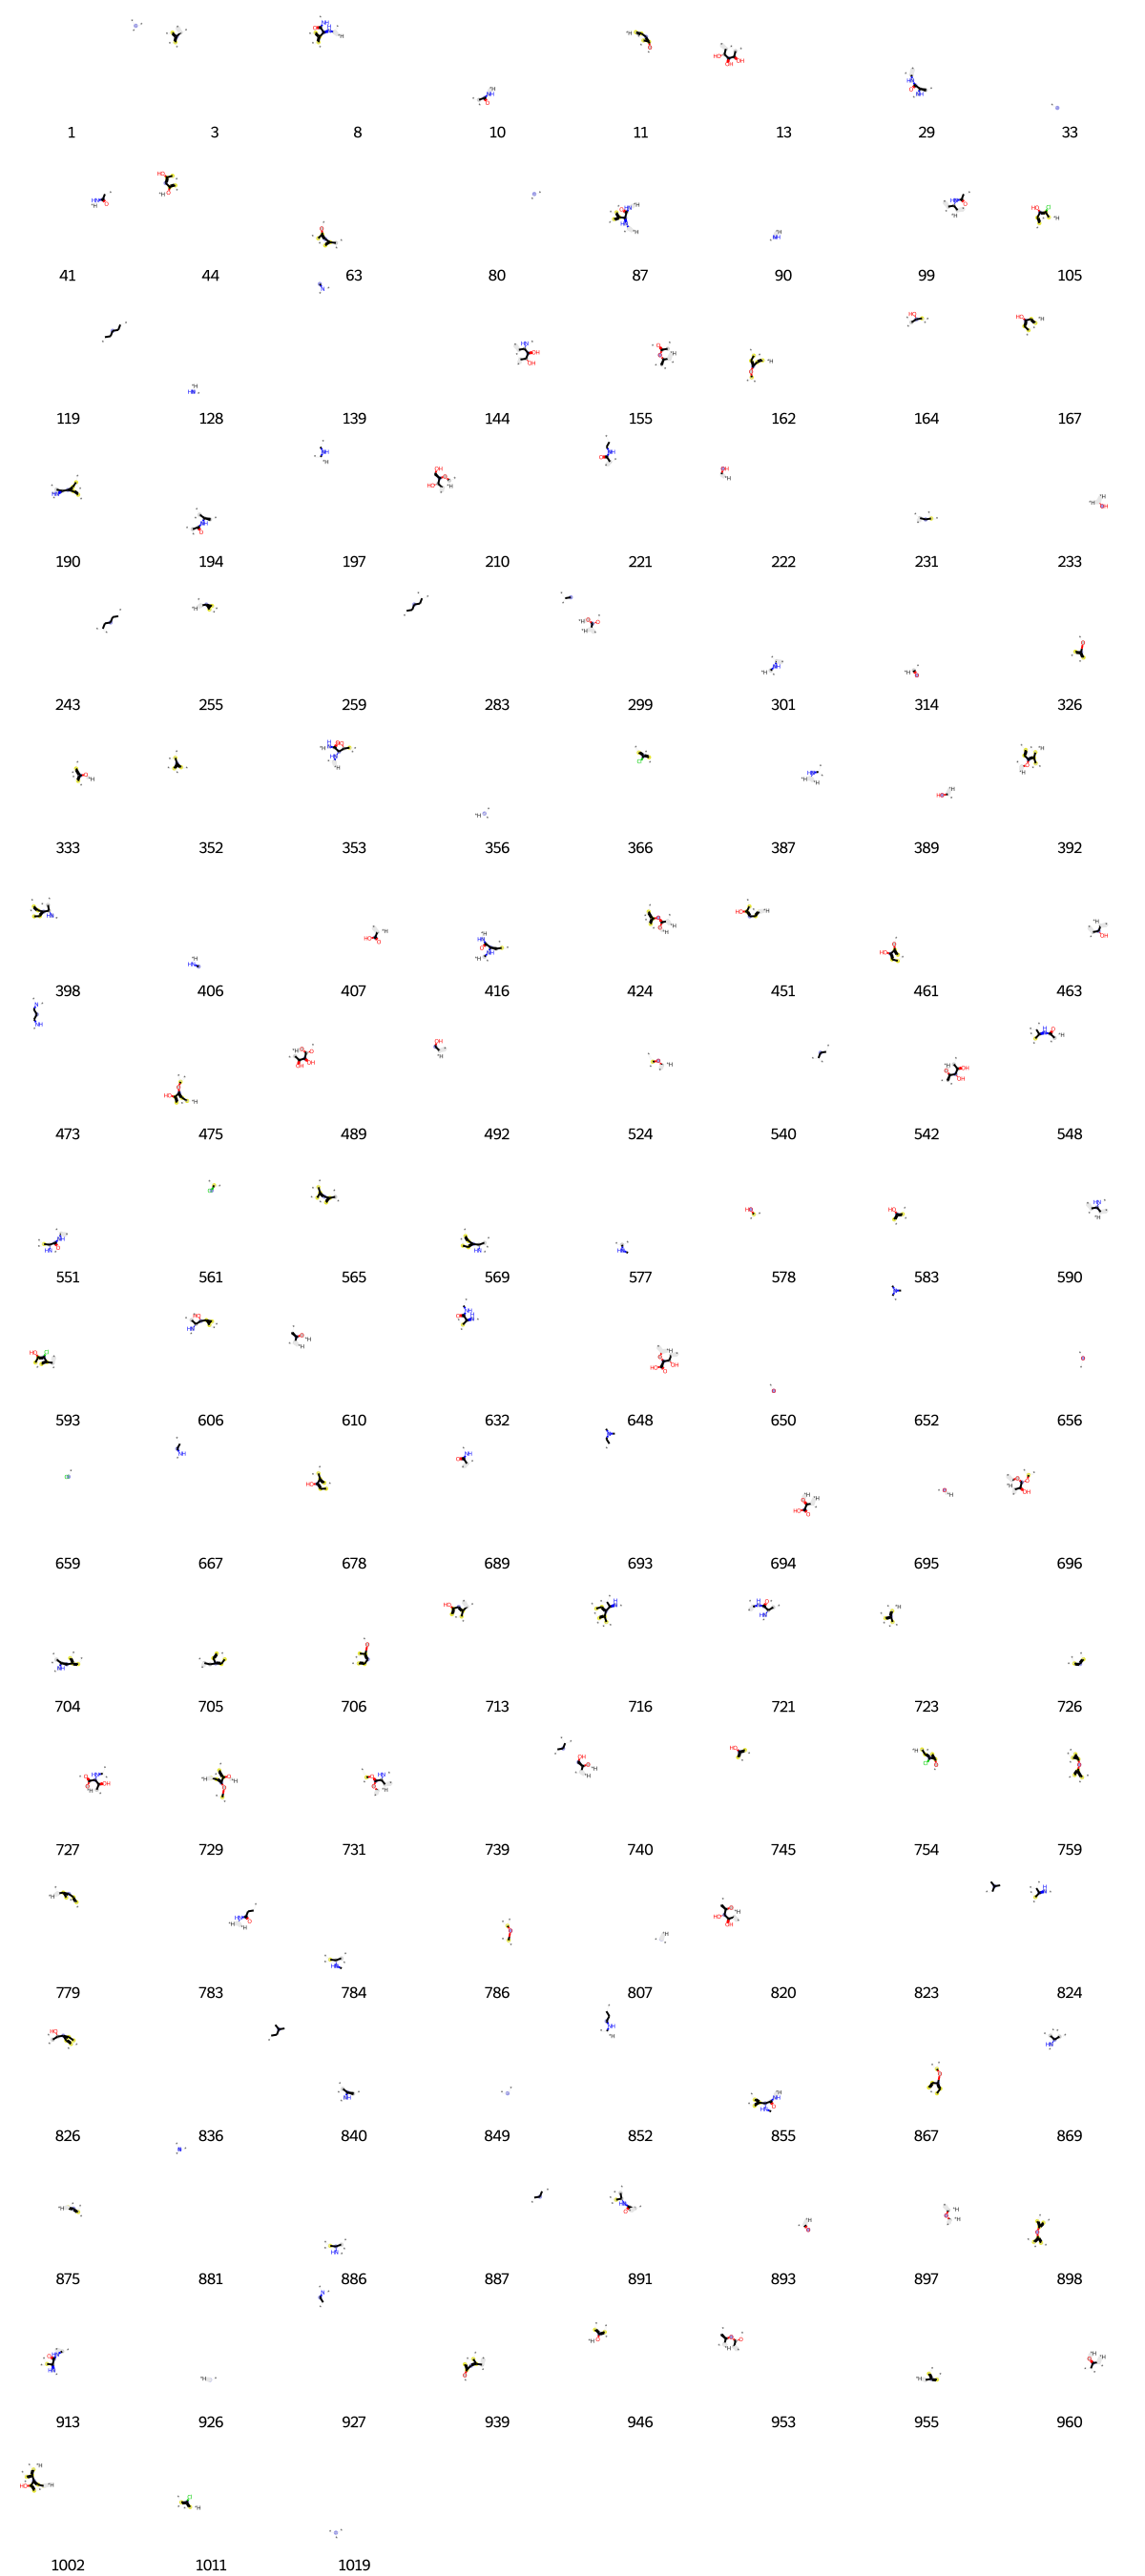

In [1730]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [1731]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[10,
 21,
 23,
 28,
 33,
 72,
 80,
 117,
 121,
 128,
 148,
 149,
 171,
 185,
 219,
 222,
 250,
 251,
 310,
 314,
 356,
 392,
 400,
 473,
 503,
 557,
 564,
 586,
 640,
 650,
 667,
 710,
 715,
 726,
 730,
 753,
 755,
 769,
 771,
 785,
 790,
 807,
 838,
 849,
 875,
 881,
 887,
 927,
 935,
 939,
 958,
 978]

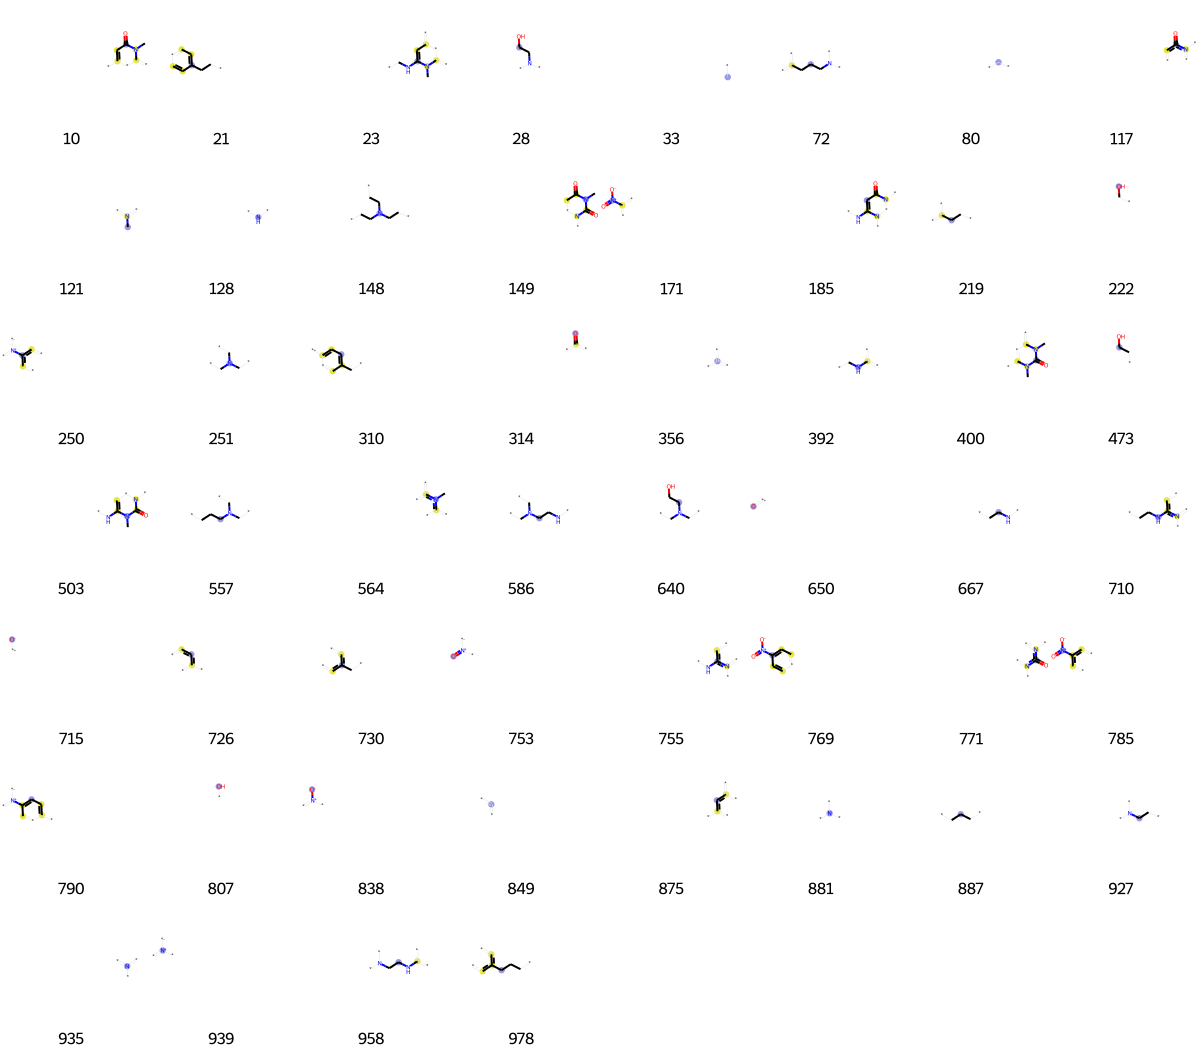

In [1732]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [1733]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[4,
 33,
 92,
 114,
 121,
 128,
 140,
 147,
 162,
 193,
 205,
 218,
 240,
 242,
 259,
 301,
 302,
 315,
 317,
 354,
 356,
 378,
 385,
 389,
 392,
 401,
 405,
 446,
 454,
 456,
 531,
 543,
 552,
 573,
 600,
 620,
 650,
 675,
 698,
 709,
 792,
 807,
 813,
 831,
 849,
 851,
 893,
 926,
 927,
 935,
 980,
 1005,
 1019]

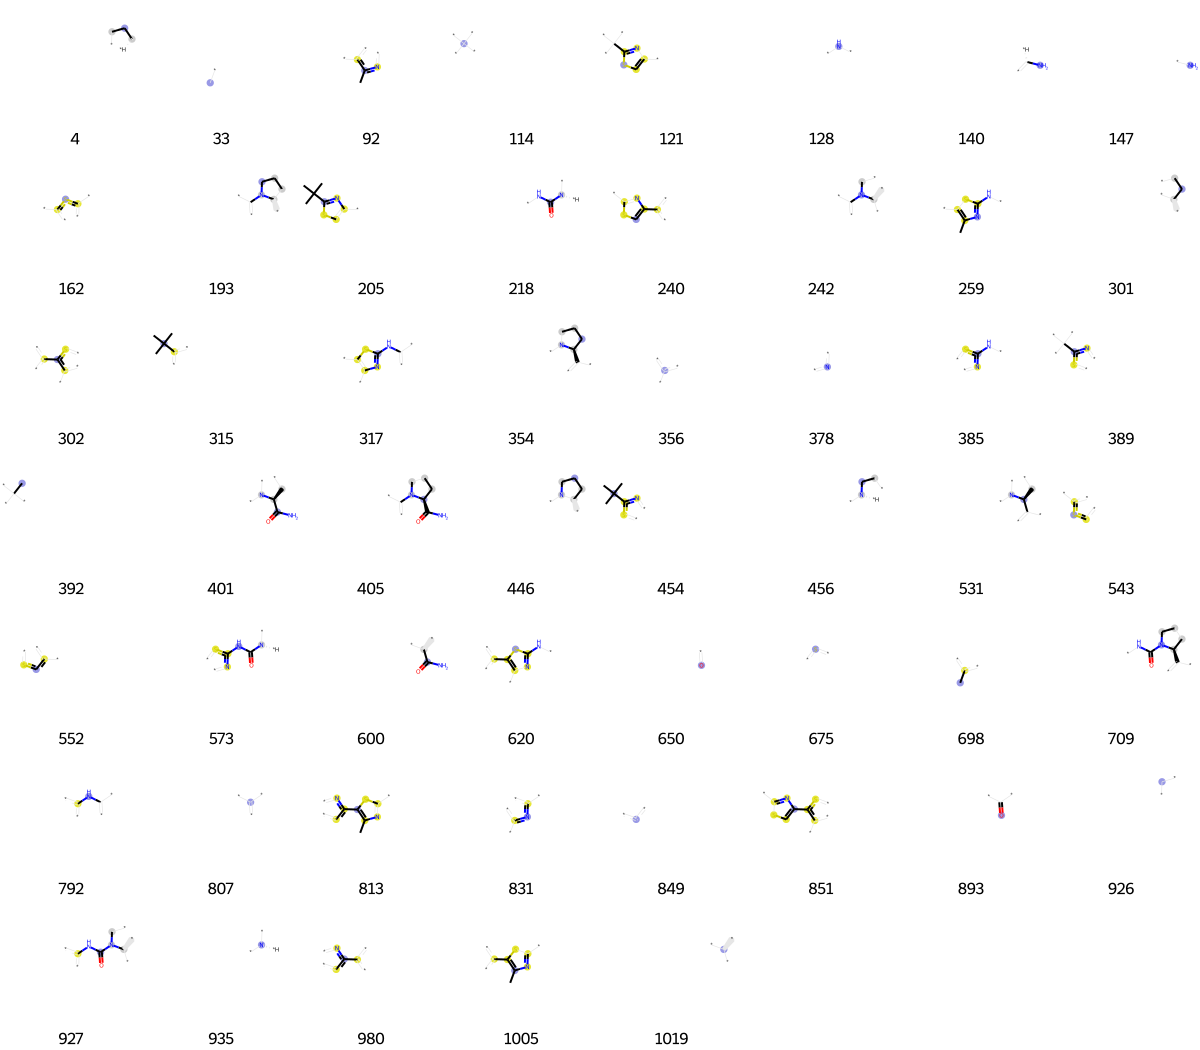

In [1734]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [1735]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[1,
 13,
 33,
 53,
 73,
 80,
 157,
 167,
 194,
 210,
 222,
 231,
 233,
 255,
 285,
 299,
 314,
 322,
 356,
 357,
 373,
 392,
 430,
 457,
 463,
 487,
 489,
 492,
 512,
 524,
 550,
 576,
 578,
 583,
 585,
 590,
 610,
 650,
 656,
 695,
 722,
 723,
 740,
 745,
 750,
 751,
 772,
 781,
 807,
 819,
 820,
 841,
 849,
 869,
 871,
 875,
 881,
 897,
 915,
 926,
 942,
 953,
 965,
 975,
 1010,
 1011,
 1019]

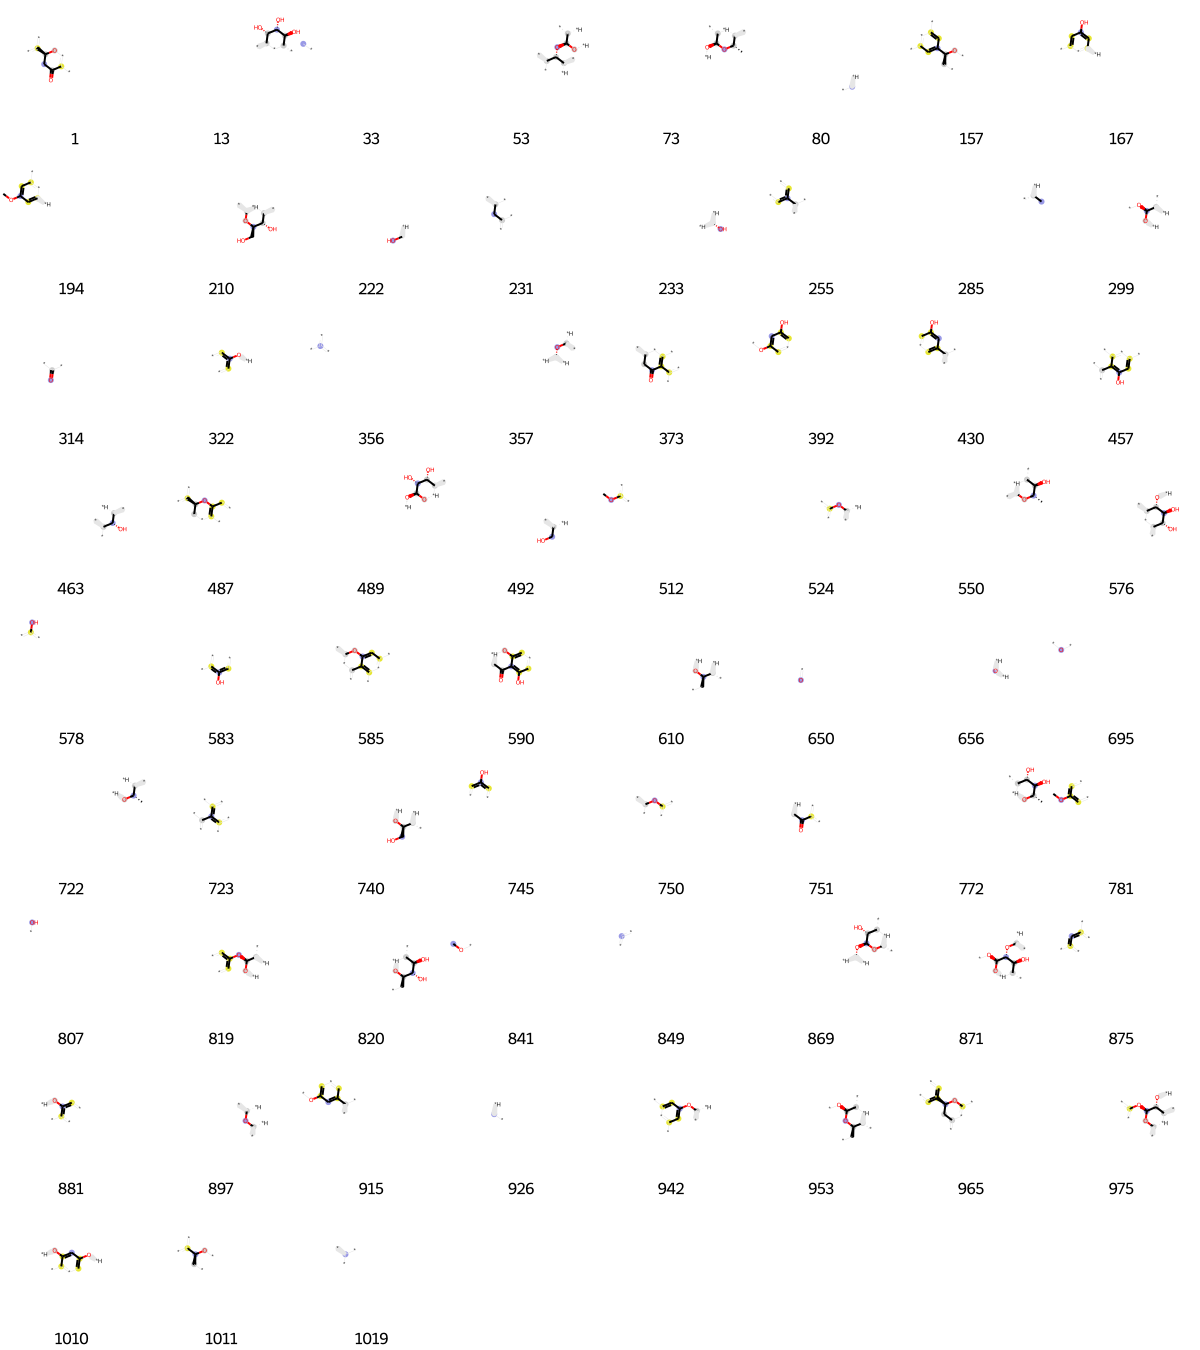

In [1736]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [1737]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[4,
 5,
 64,
 74,
 80,
 122,
 130,
 131,
 140,
 175,
 192,
 226,
 234,
 268,
 301,
 314,
 333,
 356,
 378,
 393,
 407,
 433,
 448,
 456,
 461,
 473,
 484,
 514,
 549,
 562,
 585,
 588,
 604,
 621,
 650,
 675,
 680,
 726,
 755,
 767,
 810,
 849,
 885,
 890,
 893,
 908,
 926,
 935,
 968,
 983,
 1019,
 1023]

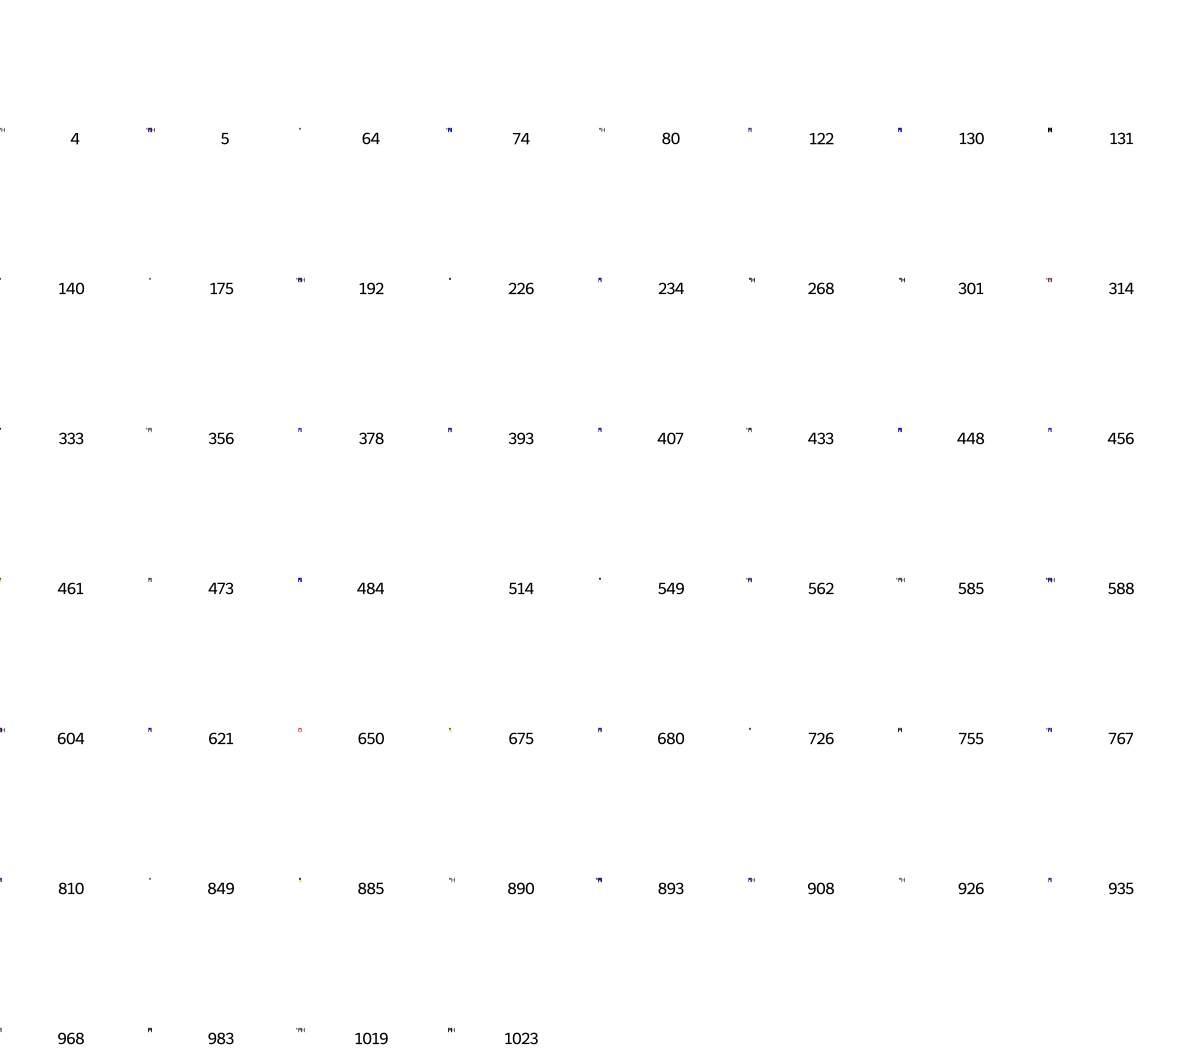

In [1738]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [1739]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[4,
 19,
 36,
 41,
 64,
 71,
 80,
 90,
 114,
 128,
 138,
 169,
 176,
 184,
 191,
 212,
 235,
 237,
 243,
 255,
 260,
 283,
 288,
 294,
 314,
 321,
 335,
 356,
 378,
 394,
 396,
 415,
 428,
 436,
 448,
 459,
 470,
 500,
 516,
 537,
 614,
 646,
 650,
 668,
 699,
 713,
 726,
 751,
 767,
 787,
 792,
 795,
 807,
 842,
 843,
 849,
 862,
 875,
 893,
 901,
 904,
 926,
 935,
 940,
 943,
 956,
 1015,
 1019]

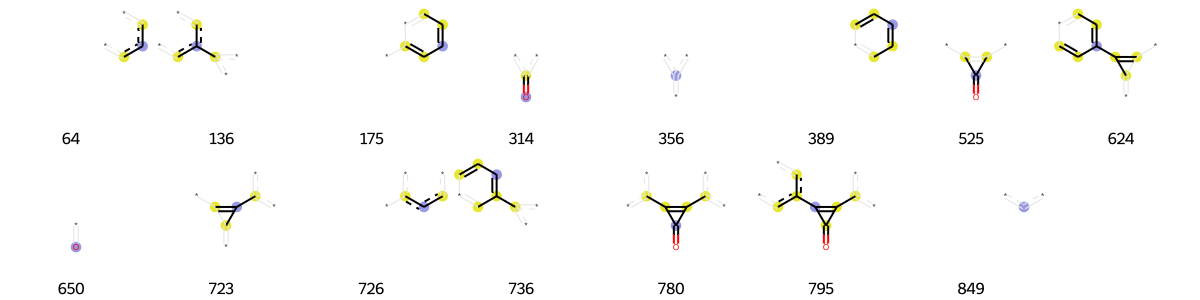

In [1740]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [1741]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[1,
 2,
 4,
 33,
 80,
 87,
 114,
 128,
 184,
 248,
 266,
 285,
 288,
 289,
 310,
 320,
 325,
 356,
 361,
 378,
 389,
 392,
 428,
 456,
 511,
 518,
 564,
 578,
 602,
 643,
 650,
 656,
 659,
 675,
 714,
 726,
 736,
 745,
 746,
 779,
 792,
 793,
 807,
 831,
 848,
 849,
 872,
 886,
 888,
 893,
 917,
 926,
 934,
 980,
 1023]

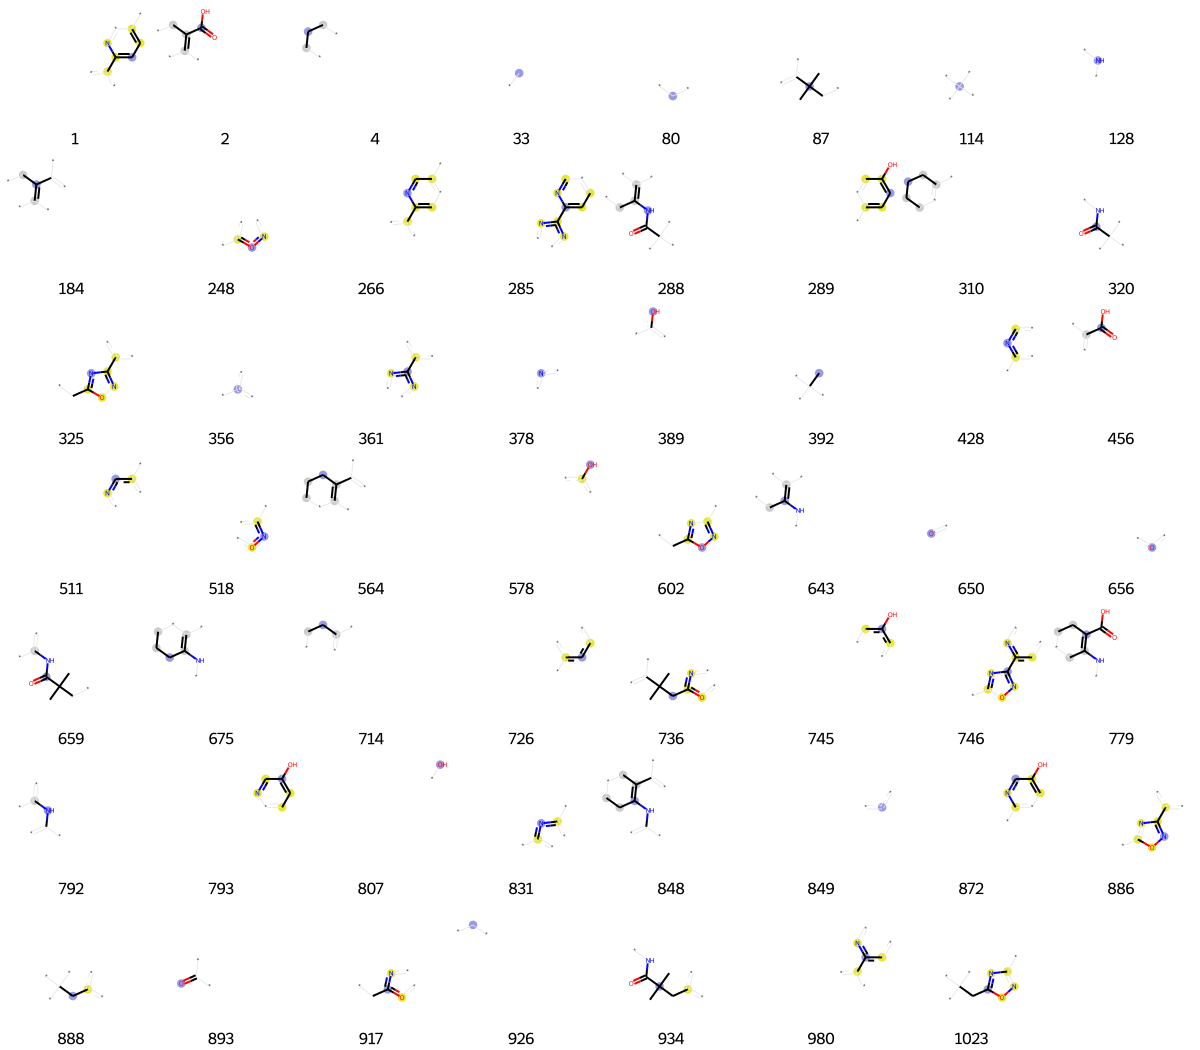

In [1742]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [1743]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[8,
 19,
 23,
 64,
 356,
 378,
 389,
 423,
 428,
 436,
 448,
 456,
 490,
 650,
 704,
 726,
 807,
 842,
 849,
 893,
 967,
 979]

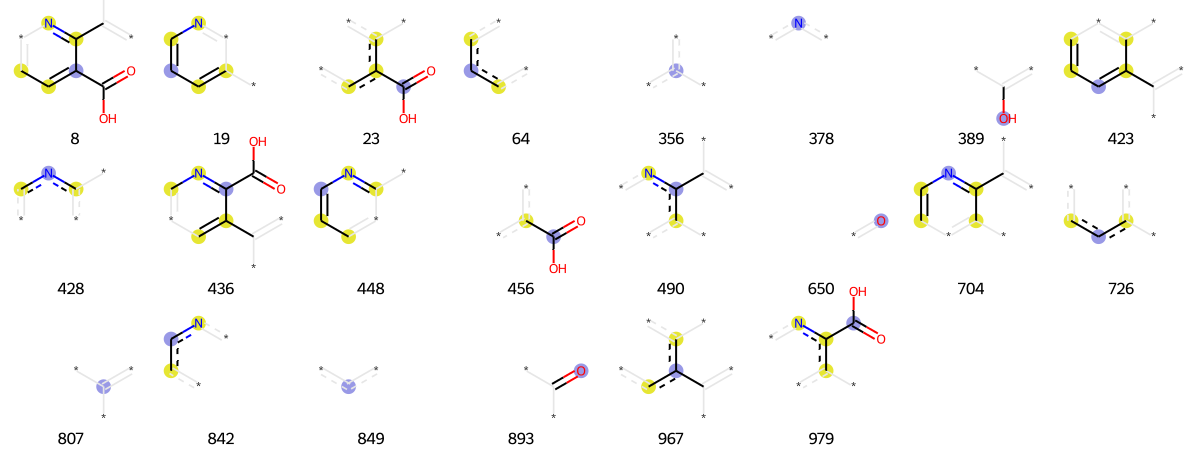

In [1744]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [1745]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[4,
 14,
 41,
 53,
 61,
 80,
 128,
 191,
 232,
 246,
 263,
 307,
 319,
 350,
 356,
 358,
 378,
 385,
 389,
 428,
 452,
 479,
 501,
 502,
 540,
 543,
 554,
 650,
 675,
 713,
 715,
 726,
 792,
 807,
 840,
 842,
 843,
 849,
 883,
 893,
 901,
 905]

In [1746]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [1747]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[13,
 33,
 80,
 145,
 147,
 172,
 250,
 251,
 294,
 356,
 361,
 375,
 428,
 433,
 469,
 494,
 498,
 514,
 568,
 591,
 620,
 644,
 650,
 673,
 695,
 709,
 718,
 726,
 794,
 807,
 849,
 875,
 881,
 887,
 893,
 910,
 927,
 932,
 946,
 957]

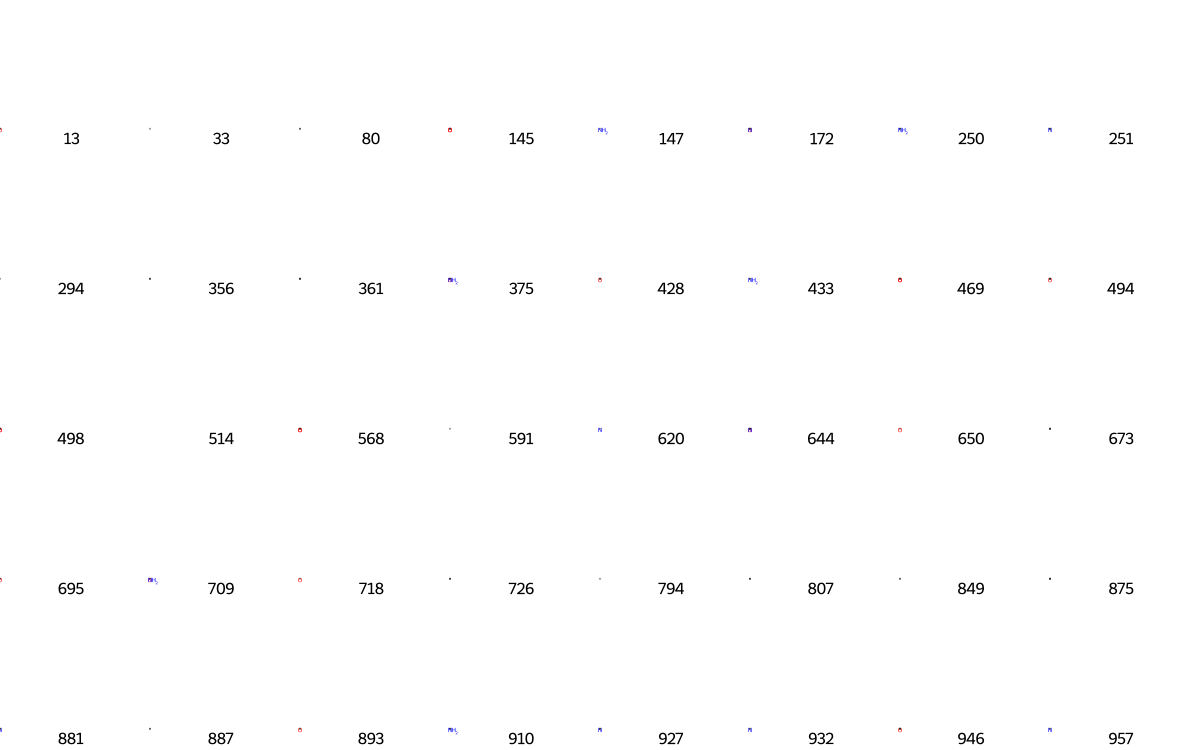

In [1748]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [1749]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[16,
 33,
 45,
 80,
 119,
 121,
 136,
 198,
 213,
 215,
 252,
 289,
 294,
 333,
 350,
 351,
 356,
 381,
 387,
 420,
 424,
 452,
 481,
 517,
 578,
 591,
 596,
 650,
 698,
 726,
 745,
 754,
 794,
 802,
 807,
 849,
 852,
 875,
 887,
 893,
 896,
 908,
 935,
 994,
 997]

In [1750]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [1751]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[2,
 4,
 33,
 36,
 80,
 116,
 128,
 141,
 144,
 224,
 250,
 301,
 306,
 356,
 367,
 378,
 387,
 395,
 396,
 428,
 433,
 498,
 506,
 519,
 529,
 534,
 539,
 563,
 571,
 573,
 602,
 610,
 631,
 641,
 652,
 658,
 675,
 725,
 762,
 807,
 816,
 826,
 847,
 849,
 890,
 926,
 935,
 952,
 1005,
 1019]

In [1752]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [1753]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[33,
 80,
 104,
 139,
 179,
 212,
 219,
 310,
 356,
 366,
 378,
 424,
 530,
 561,
 652,
 659,
 666,
 677,
 693,
 726,
 730,
 812,
 849,
 875,
 881,
 927,
 950,
 1008]

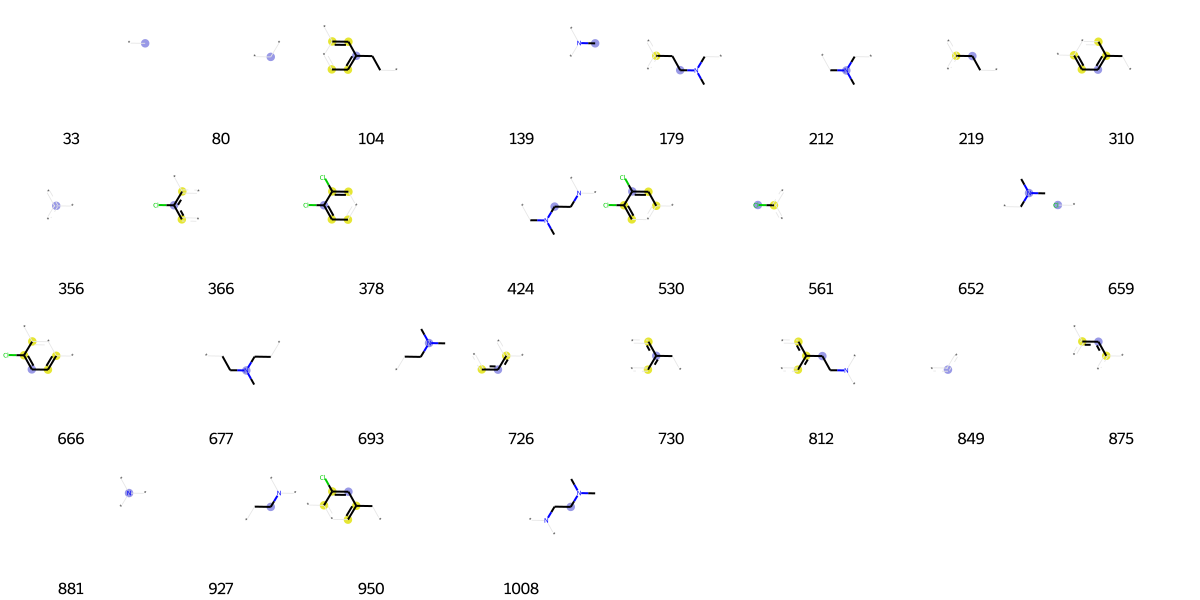

In [1754]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [1755]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[1,
 80,
 186,
 222,
 227,
 231,
 278,
 377,
 482,
 508,
 650,
 657,
 694,
 807,
 829,
 831,
 888,
 1004,
 1020]

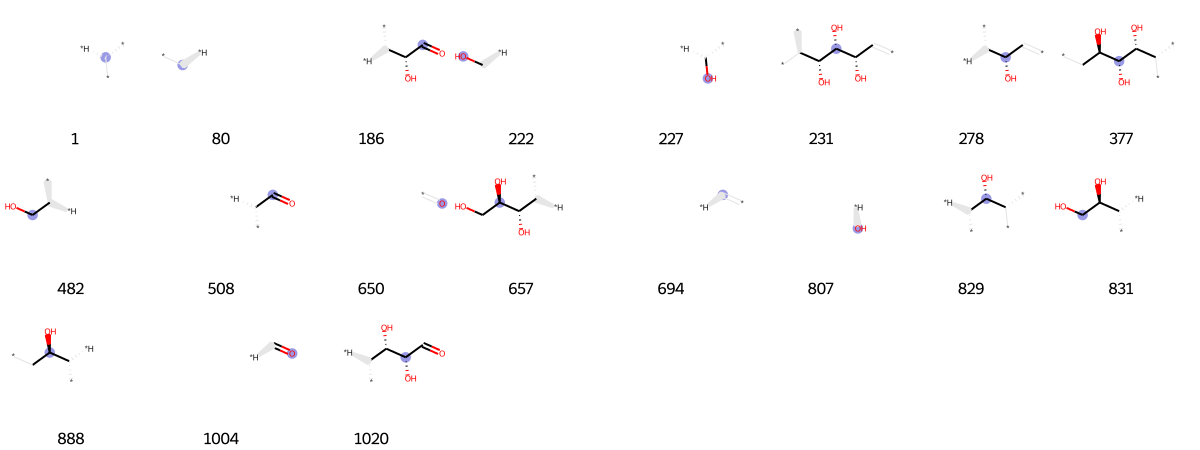

In [1756]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [1757]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[1,
 33,
 36,
 42,
 46,
 50,
 59,
 80,
 90,
 102,
 106,
 121,
 122,
 130,
 147,
 154,
 179,
 225,
 231,
 232,
 249,
 250,
 264,
 271,
 283,
 285,
 287,
 288,
 314,
 325,
 338,
 349,
 356,
 482,
 497,
 512,
 527,
 540,
 561,
 568,
 579,
 650,
 652,
 656,
 659,
 669,
 679,
 695,
 698,
 733,
 750,
 795,
 798,
 801,
 807,
 841,
 849,
 850,
 857,
 861,
 862,
 875,
 883,
 884,
 893,
 901,
 926,
 934,
 935,
 937,
 946,
 953,
 955,
 972,
 978,
 987,
 994,
 1000,
 1011,
 1019]

In [1758]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [1759]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[0,
 1,
 13,
 33,
 54,
 64,
 74,
 80,
 89,
 90,
 121,
 139,
 175,
 234,
 274,
 302,
 314,
 316,
 341,
 356,
 378,
 389,
 400,
 503,
 504,
 506,
 557,
 561,
 564,
 650,
 652,
 657,
 659,
 672,
 690,
 693,
 695,
 703,
 705,
 721,
 726,
 770,
 771,
 819,
 831,
 849,
 881,
 908,
 927,
 935]

In [1760]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [1761]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 11,
 33,
 80,
 116,
 147,
 158,
 389,
 394,
 403,
 534,
 650,
 739,
 767,
 786,
 807,
 820,
 825,
 893,
 918,
 1021]

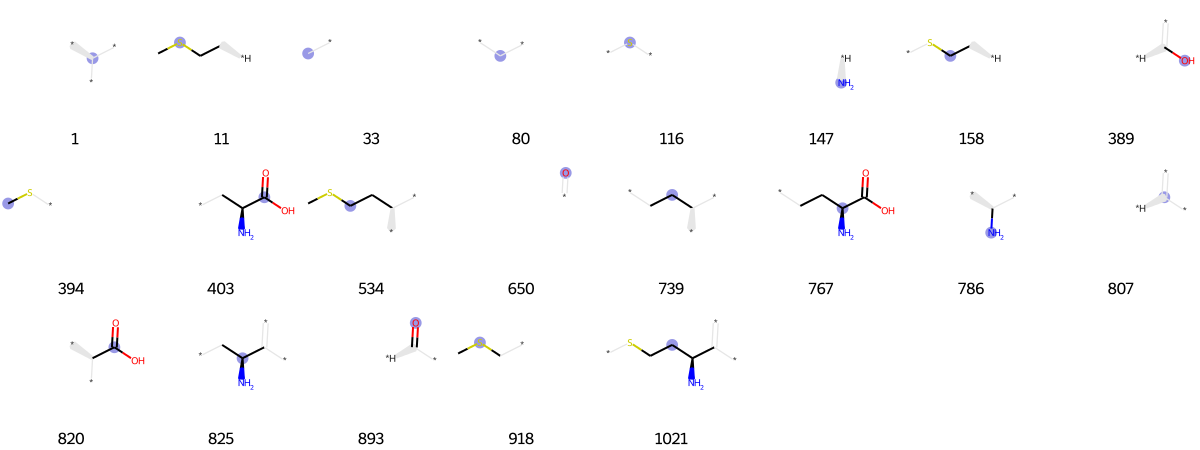

In [1762]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])